<h1>2- Data Profiling</h1>

<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px;">This section offers an in-depth exploration of the structure, statistics, and spread of the data found in our "member model data" and "city model data" tables. It presents a comprehensive snapshot of the data's features and subtleties.</p>

In [1]:
# Dependencies and Setup
import package as pk

Package: Resources loaded. ☑


<h2>1-2- Import Data from BigQuery Tables into Spark DataFrames</h2>

In [2]:
# Instantiate the 'DataToSpark' class to handle KKBOX data
kkbox = pk.DataToSpark("customer-churn-391917", "kkbox")

# Load specific tables into DataFrames
tables_to_load = ["member_model_main","city_model_main"]
kkbox.load_tables(tables_to_load)

# Retrieve the stored DataFrames
table = kkbox.get_tables()

In [3]:
# Create an instance of the class with models
member_model_df = table["member_model_main"]
city_model_df = table["city_model_main"]

<h2>2-2- Visualization and Statistics</h2>

<h3> 1-2-2- Churn Data</h3> 

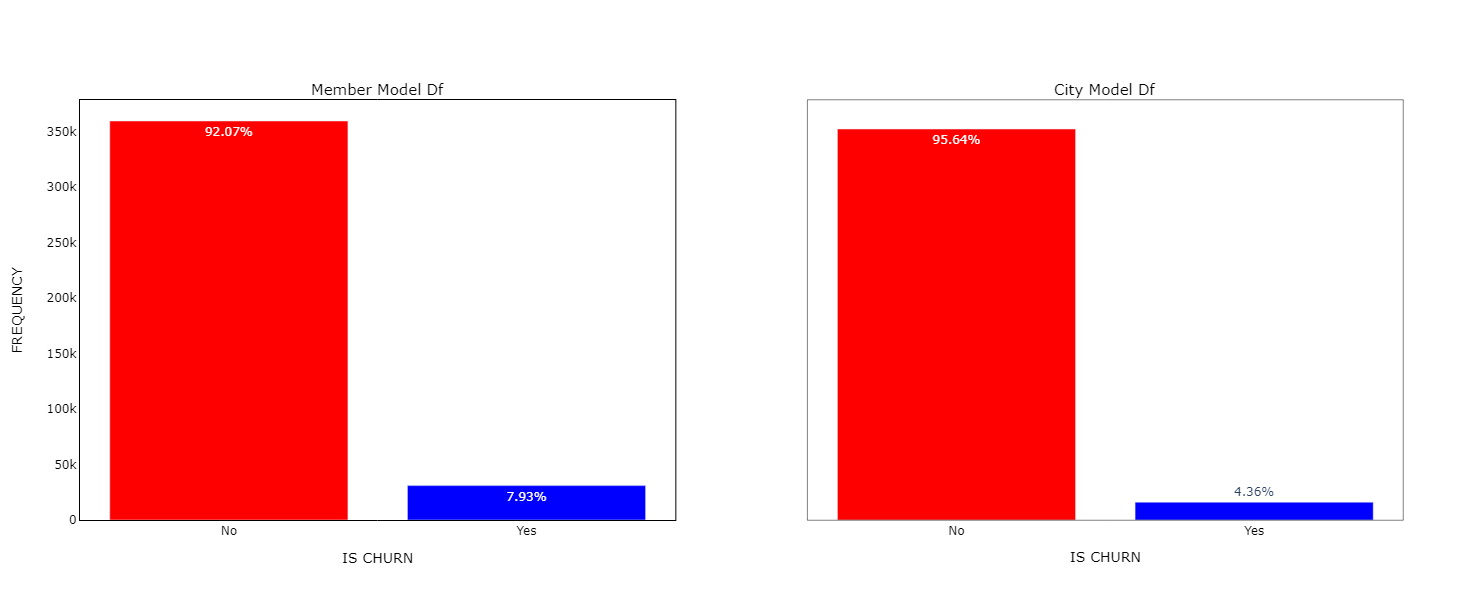

In [4]:
# Call the 'bar_chart' function from plots.py to create a churn bar chart
pk.bar_chart([member_model_df, city_model_df], 'is_churn')

<h4 style="padding: 10px;">Observation</h4>
<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #DEF0ED">In our dataset, churn represents whether users discontinue their subscription or service. Upon analyzing the member_model and city_model data, we found a pronounced trend towards the "No" churn category: <b>92.07%</b> in member_model and <b>95.64%</b> in city_model. This indicates a strong retention rate for the users in both categories.</p>

<h3> 2-2-2- City Data</h3> 

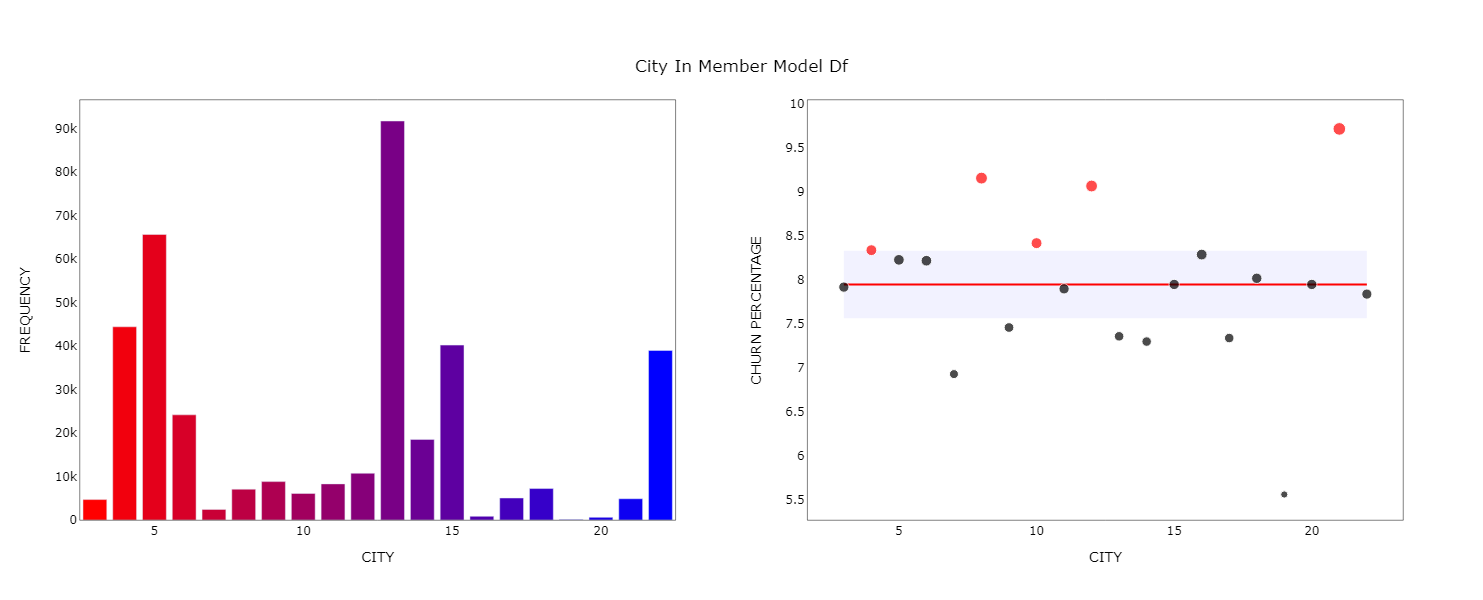

In [5]:
# Use the 'bar_scatter_chart' from plots.py to view city data.
pk.bar_scatter_chart(member_model_df, 'city')

<h4 style="padding: 10px;">Observation</h4>
<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #DEF0ED">The member dataset shows that 51.92% of the entries are from a particular city, referred to as 'city 1'. Following this, 'city 13' and 'city 5' have the highest frequencies. Furthermore, there's no observable correlation between the city of origin and the churn rate.</p>

<h3> 3-2-2- Age Evaluation</h3> 
<ol>
    <p><ins>Based on Age Category:</ins></p>
    <li>Unclear: Input 0 (Category 0)</li>
    <li>Children: 1-12 years (Category 1)</li>
    <li>Adolescents: 13-19 years (Category 2)</li>
    <li>Young Adults: 20-34 years (Category 3)</li>
    <li>Adults: 35-64 years (Category 4)</li>
    <li>Seniors: 65+ years (Category 5)</li>
</ol>

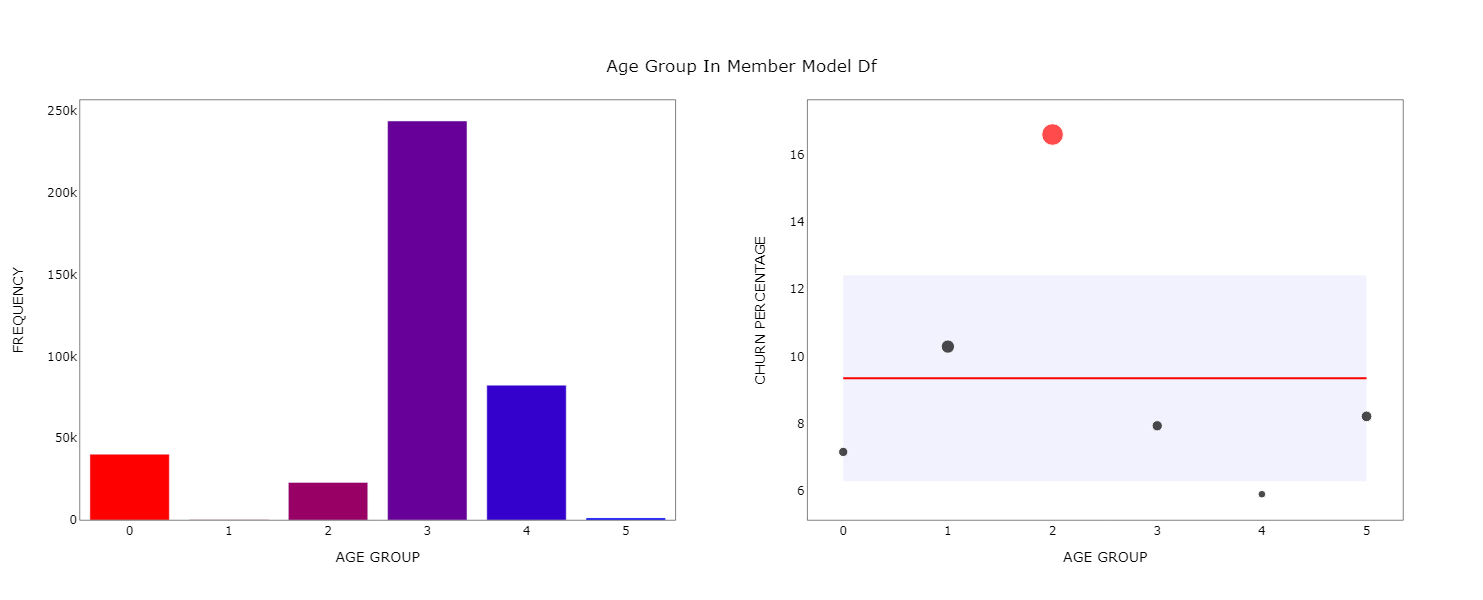

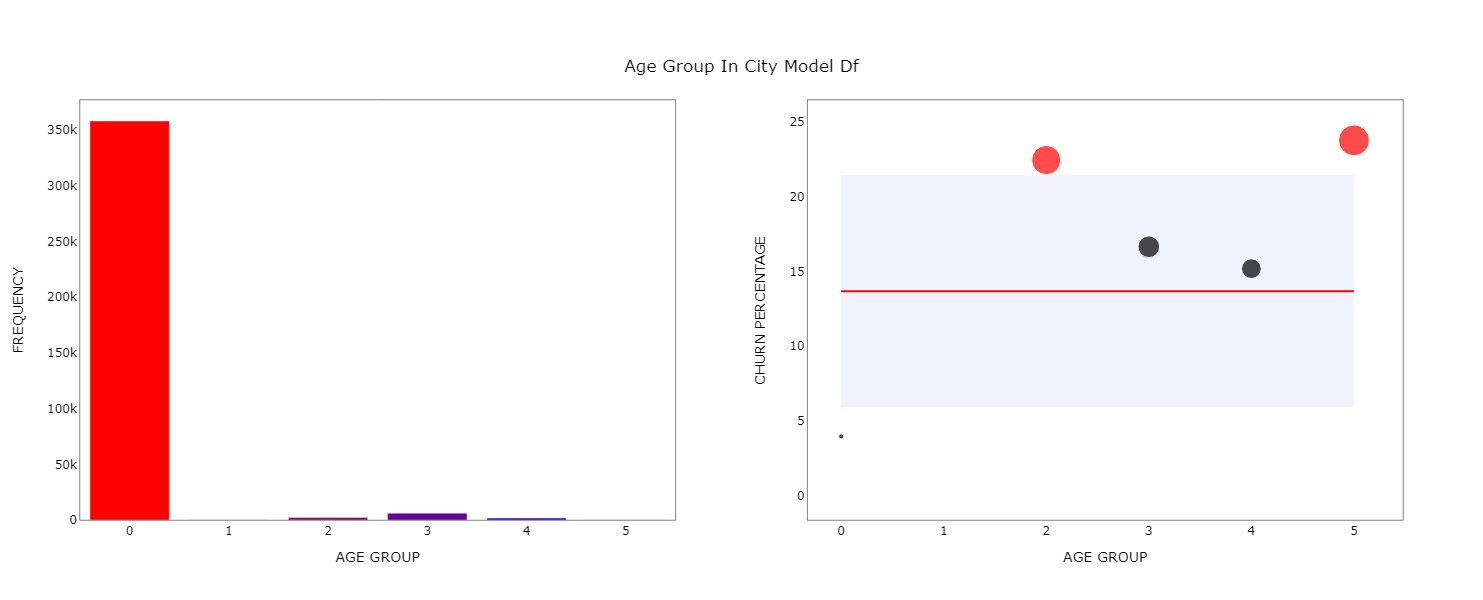

In [6]:
# Using 'bucketized' from func.py and 'bar_scatter_chart' from plots.py, categorize and display the 'bd' column.
# member_model_df
member_bd_df=pk.bucketized(member_model_df, 'bd', 'age_group', [1, 13, 20, 35, 65])
pk.bar_scatter_chart(member_bd_df, 'age_group','member_model_df')

# city_model_df
city_bd_df=pk.bucketized(city_model_df, 'bd', 'age_group', [1, 13, 20, 35, 65])
pk.bar_scatter_chart(city_bd_df, 'age_group', 'city_model_df')

<h4 style="padding: 10px;">Observation</h4>
<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #DEF0ED">Both datasets exhibit an unclear category, with the city dataset displaying the highest frequency in this category. Notably, the age group categorized as Adolescents (13-19 years, labeled as Category 2) showcases the highest churn percentage. This group's churn rate lies outside the typical statistical range for age in these datasets.</p>

<h3> 4-2-2- Gender Evaluation</h3> 
<ol>
    <p><ins>Based on Gender Category:</ins></p>
    <li>Unclear: Input null (Category 0)</li>
    <li>Male: male (Category 1)</li>
    <li>Female: female (Category 2)</li>
</ol>

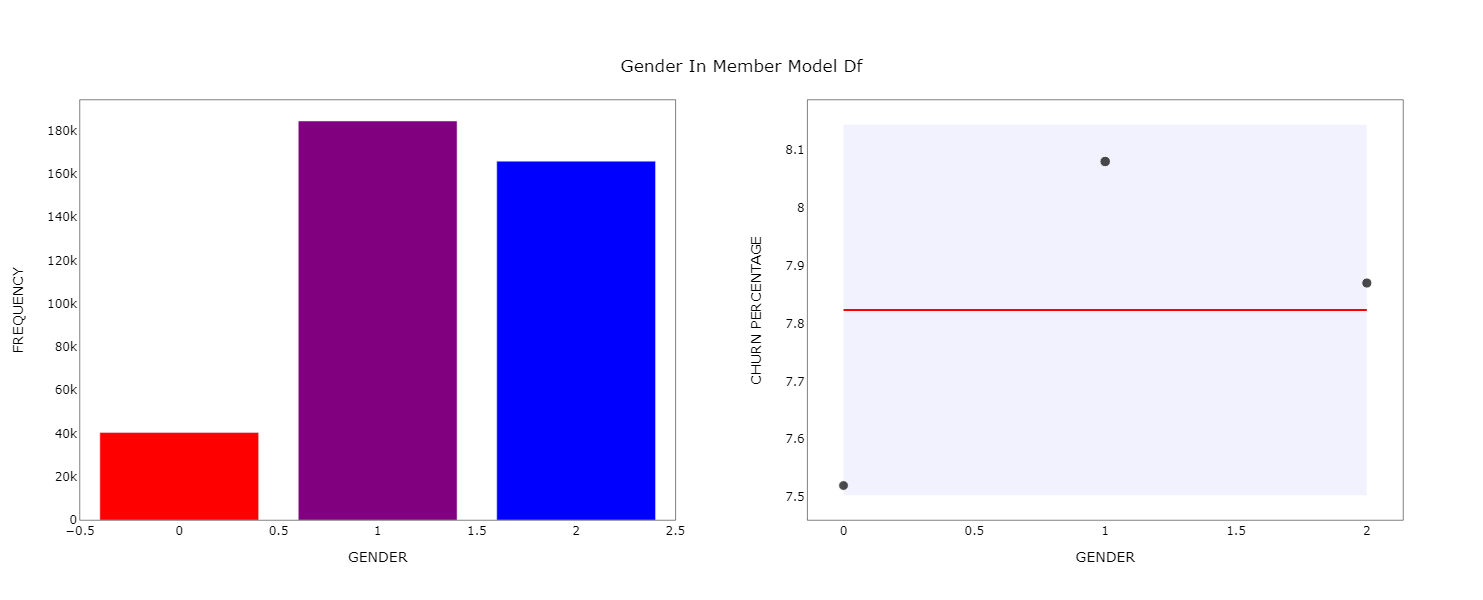

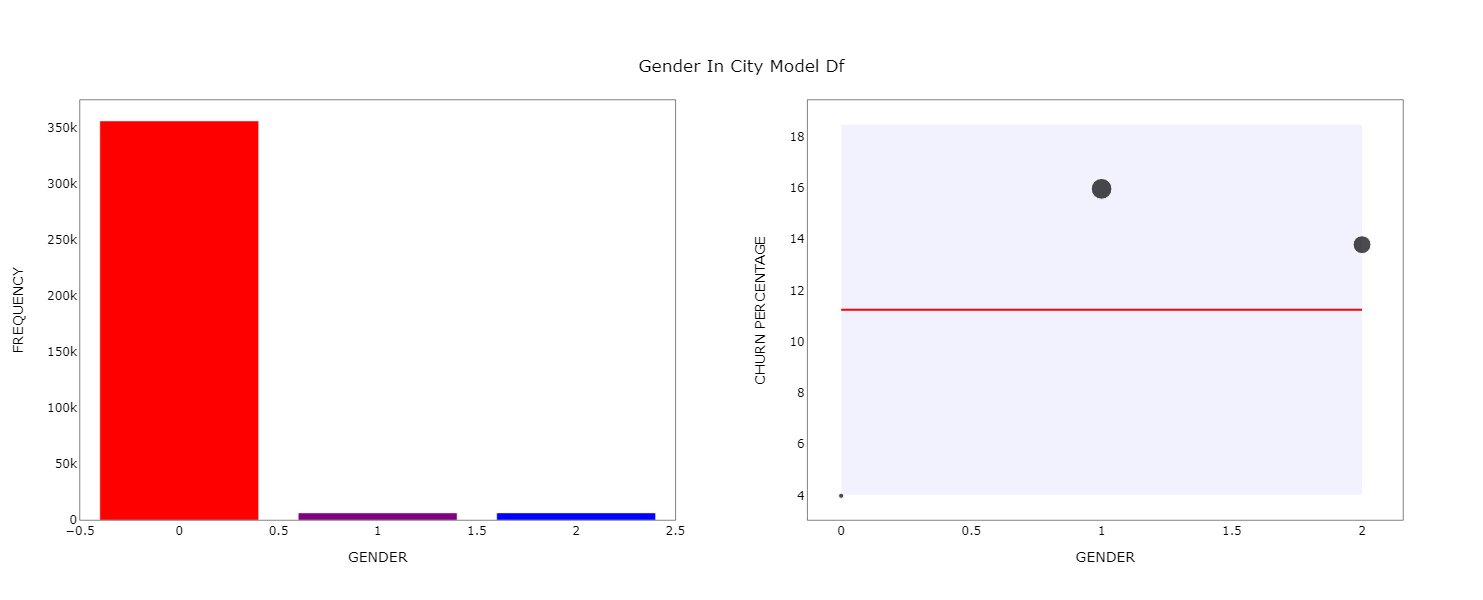

In [7]:
# Use the 'bar_scatter_chart' from plots.py to view gender data.
pk.bar_scatter_chart(member_model_df, 'gender')
pk.bar_scatter_chart(city_model_df, 'gender')

<h4 style="padding: 10px;">Observation</h4>
<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #DEF0ED">Both datasets exhibit an unclear category, with the city dataset displaying the highest frequency in this category. Notably, the male category showcases the highest churn percentage.</p>

<h3> 5-2-2- Registration Via</h3> 

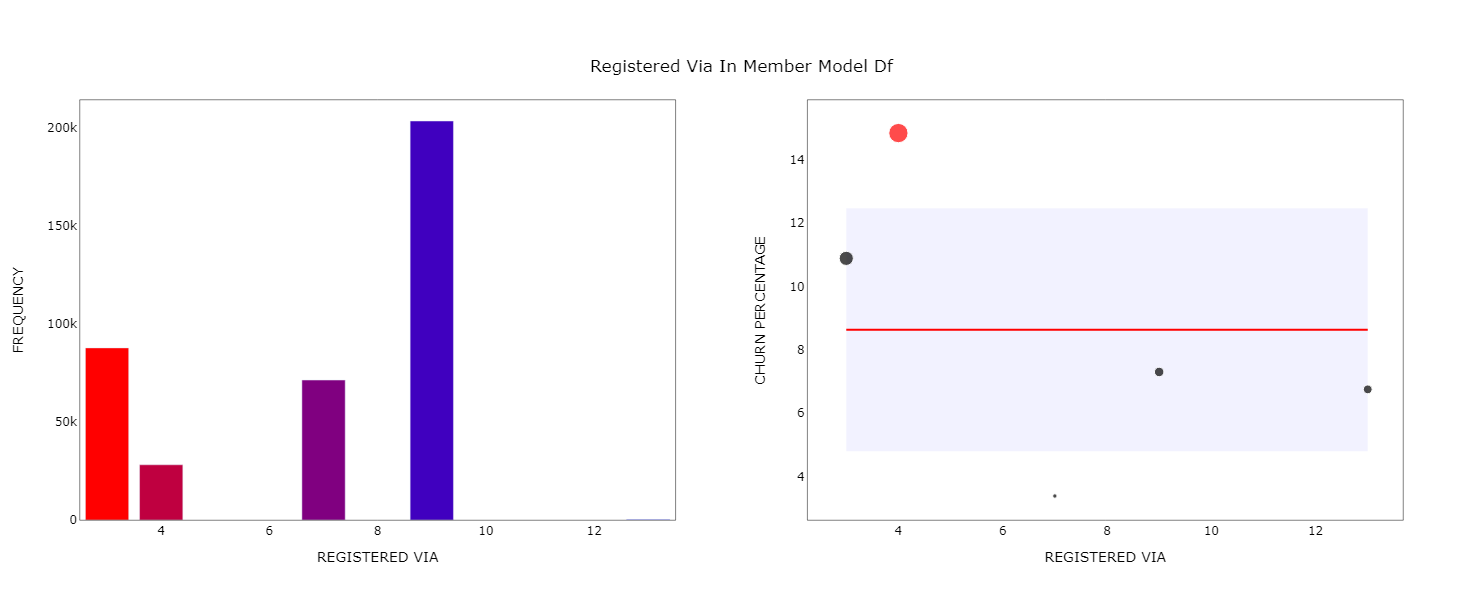

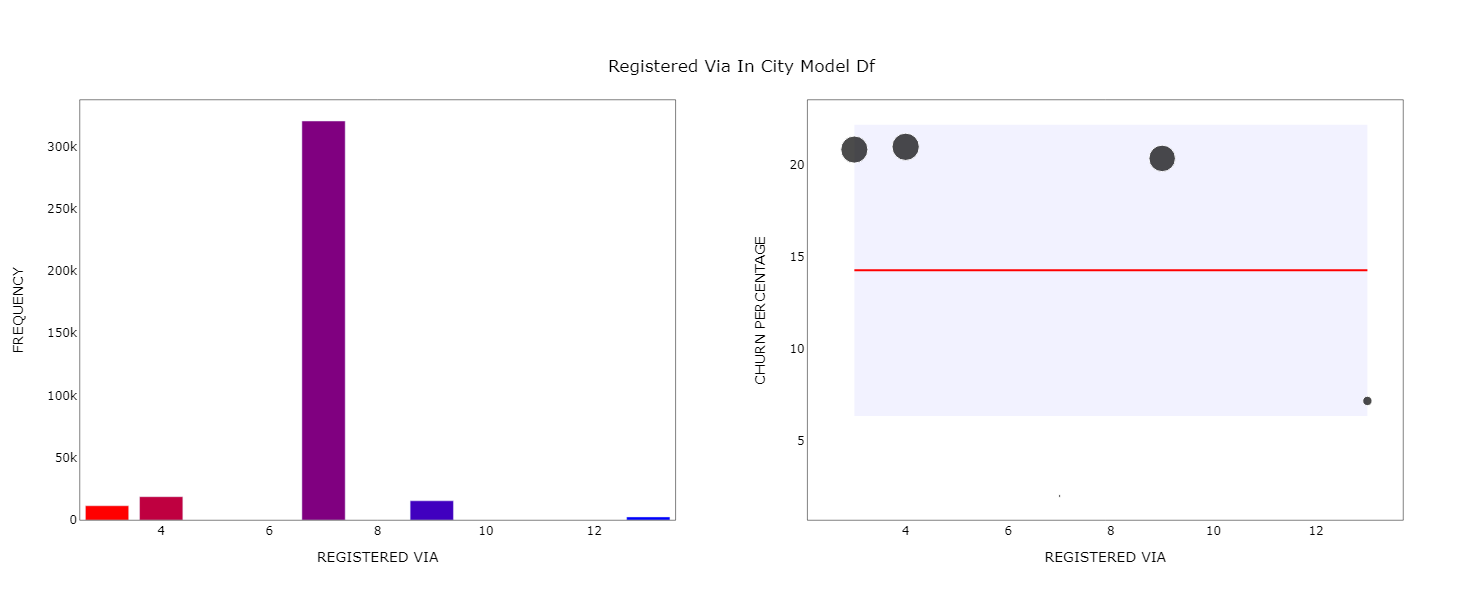

In [8]:
# Use the 'bar_scatter_chart' from plots.py to view registration via data.
pk.bar_scatter_chart(member_model_df, 'registered_via')
pk.bar_scatter_chart(city_model_df, 'registered_via')

<h4 style="padding: 10px;">Observation</h4>
<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #DEF0ED">The most common registration method in the member model dataframe is "9", while in the city model dataframe, it's "7". However, for both dataframes, "registered via 4" shows the highest churn rate. Notably, this churn rate is statistically significant in the member model dataframe.</p>

<h3> 6-2-2- Registration Dates</h3> 

In [9]:
def generate_charts(model_df: pk.DataFrame, chart_title: str) -> None:
    """
    Generate bar scatter and sub_line charts based on the provided DataFrame.
    
    The function generates a bar scatter chart for registration years less than 2017,
    and a sub_line chart for registration months within the years 2013-2016.
    
    Args:
    model_df (DataFrame): Input DataFrame with 'registration_init_time' column.
    chart_title (str): Title of the chart.
    
    Returns:
    None
    """
    
    # Extract the year from 'registration_init_time' column
    date_df = model_df.withColumn("registration_year", pk.year(pk.col("registration_init_time")))
    
    # Filter data to exclude records from the year 2017 and onwards
    date_df_filter = date_df.filter(pk.col("registration_year") < 2017)
    
    # Generate a bar scatter chart based on registration year
    year_chart = pk.bar_scatter_chart(date_df_filter, 'registration_year', chart_title)
    
    # Filter data to only include records from the last 4 years (2013-2016)
    last_4_df = date_df.filter((pk.col("registration_year") >= 2013) & (pk.col("registration_year") < 2017))
    
    # Extract month and day from 'registration_init_time'
    last_4_df = last_4_df.withColumn("registration_month", pk.month("registration_init_time"))
    last_4_df = last_4_df.withColumn("registration_day", pk.dayofmonth("registration_init_time"))
    
    # Generate a sub_line chart based on registration month within the years 2013-2016
    month_chart = pk.sub_line(last_4_df, ["registration_year", "registration_month"], [2013, 2014, 2015, 2016])

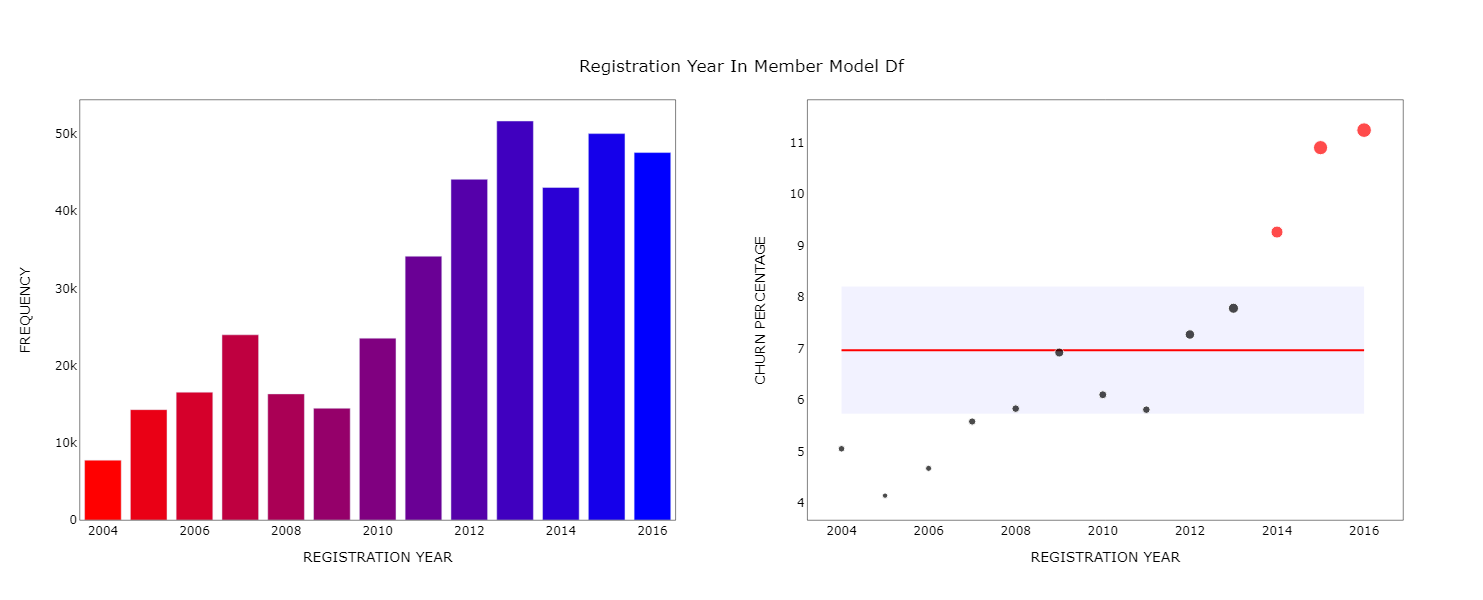

23/09/28 03:55:24 WARN org.apache.spark.util.Utils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.debug.maxToStringFields' in SparkEnv.conf.


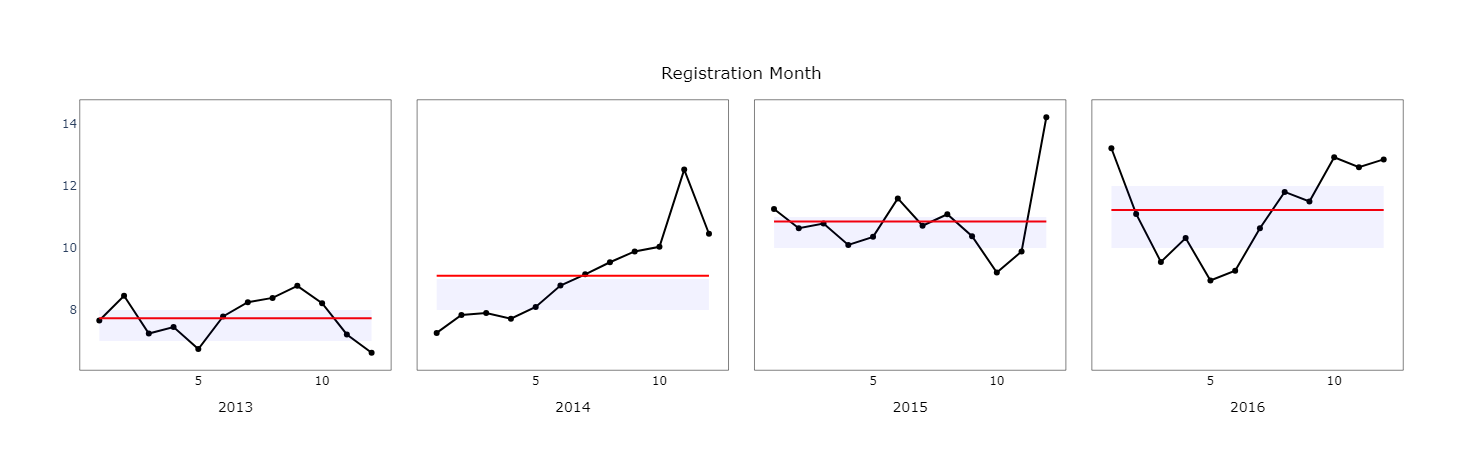

In [10]:
# member_model_df
generate_charts(member_model_df, "member_model_df")

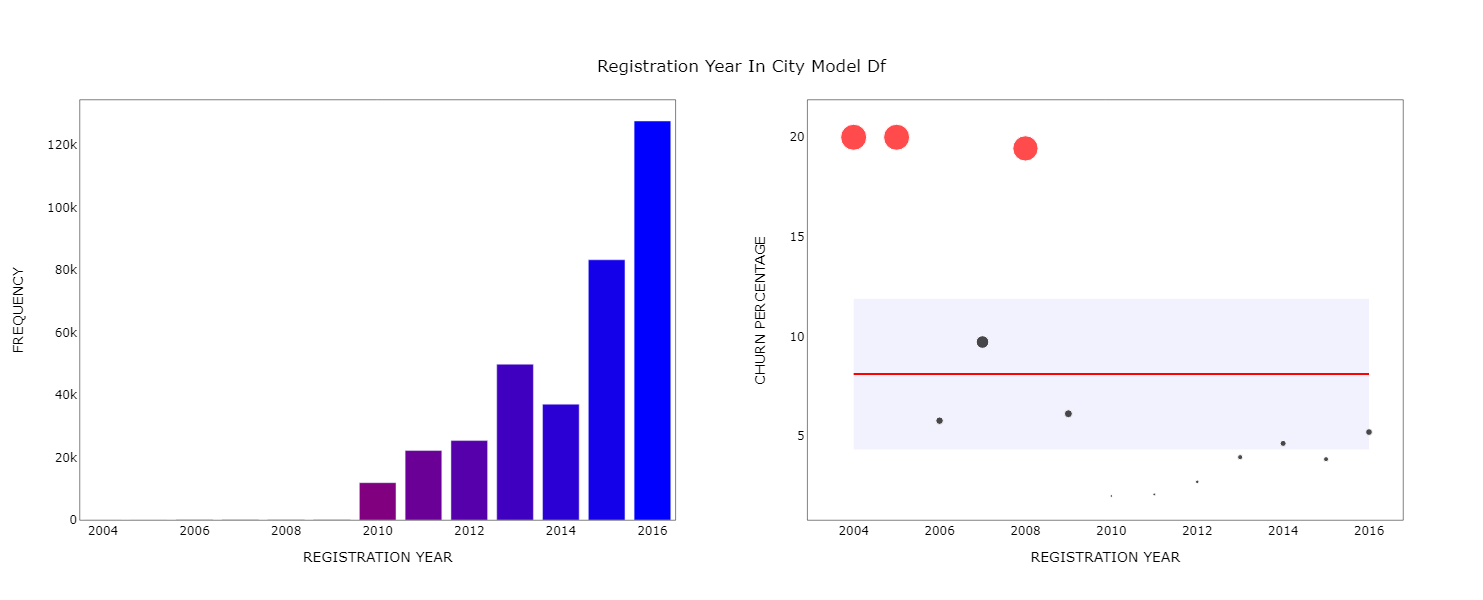

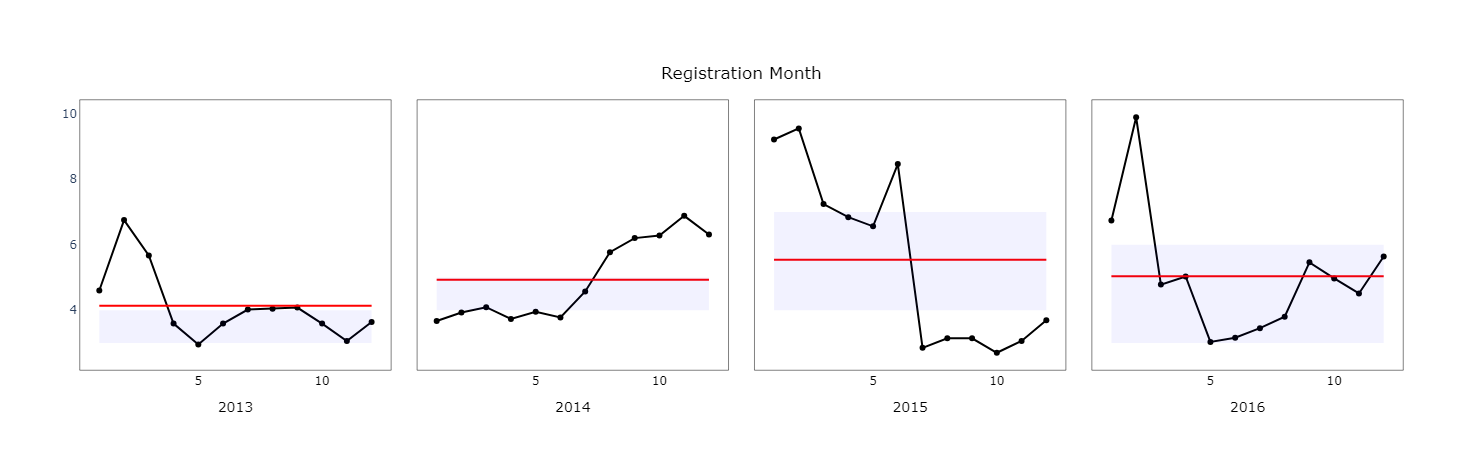

In [11]:
# city_model_df
generate_charts(city_model_df, "city_model_df")

<h4 style="padding: 10px;">Observation</h4>
<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #DEF0ED">In both datasets, the annual registration frequency has increased. However, a more pronounced rise in churn rate is only evident in the member dataframe. Breaking down the churn percentages for the last four months reveals an average increase in churn for the member model dataframe, a trend not seen in the city model dataframe. Additionally, the city model dataframe exhibits more significant fluctuations in churn.</p>

<h3> 7-2-2- Payment Method ID</h3> 

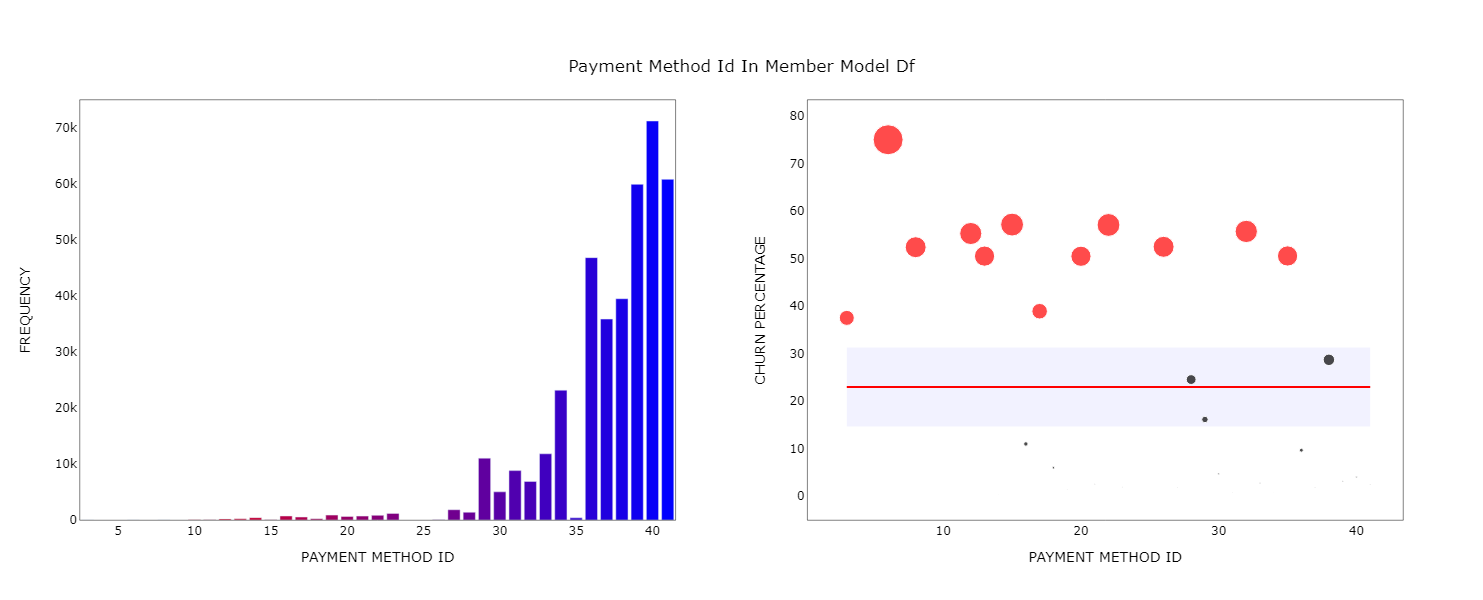

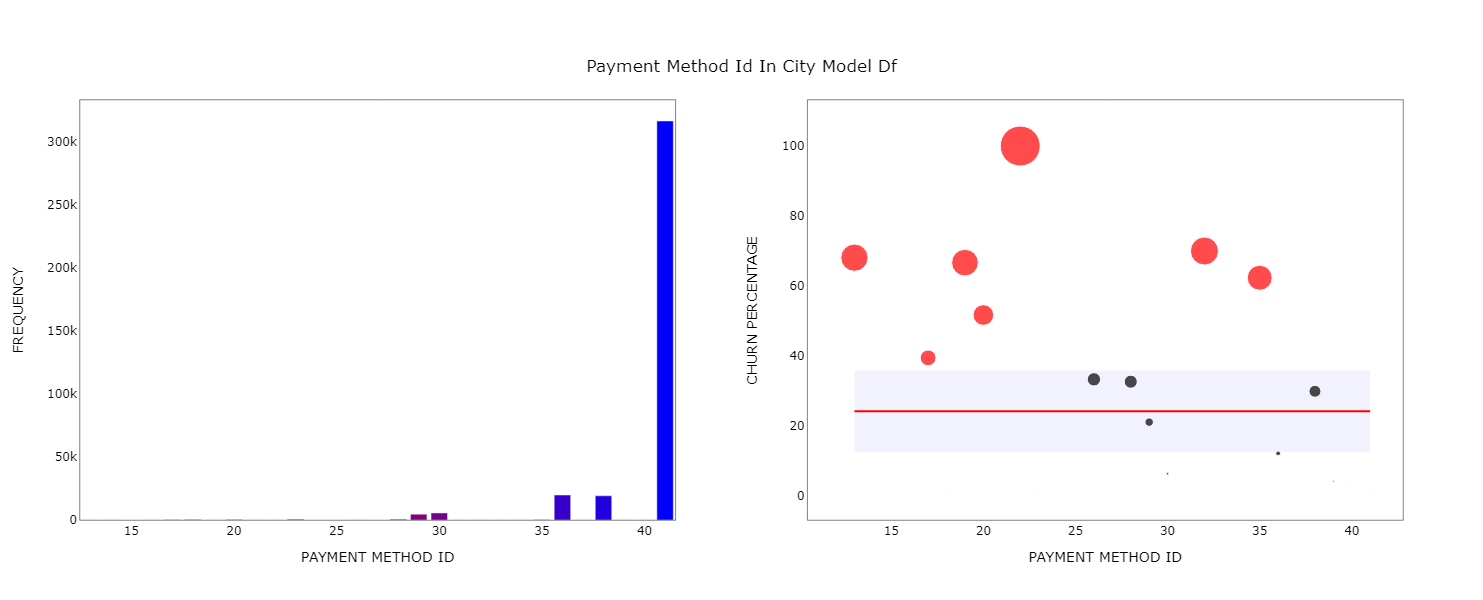

In [12]:
# Use the 'bar_scatter_chart' from plots.py to view Payment Method ID data.
pk.bar_scatter_chart(member_model_df, 'payment_method_id', None, 0.4)
pk.bar_scatter_chart(city_model_df, 'payment_method_id', None, 0.4)

<h4 style="padding: 10px;">Observation</h4>
<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #DEF0ED">Observations suggest that as the frequency of payment method ID increases, the percentage of churn decreases, indicating a strong inverse correlation.</p>

<h3> 8-2-2- Payment_Plan_Days</h3> 
<ol>
    <p><ins>Based on Subscription Category:</ins></p>
    <li>Monthly: 0 to 30 days (Category 0)</li>
    <li>Seasonally: 31 to 90 days (Category 1)</li>
    <li>Every 6 Months: 91 to 180 days (Category 2)</li>
    <li>Annually: 181 to 365 days (Category 3)</li>
    <li>One Time: 366 days and beyond (Category 4)</li>
</ol>

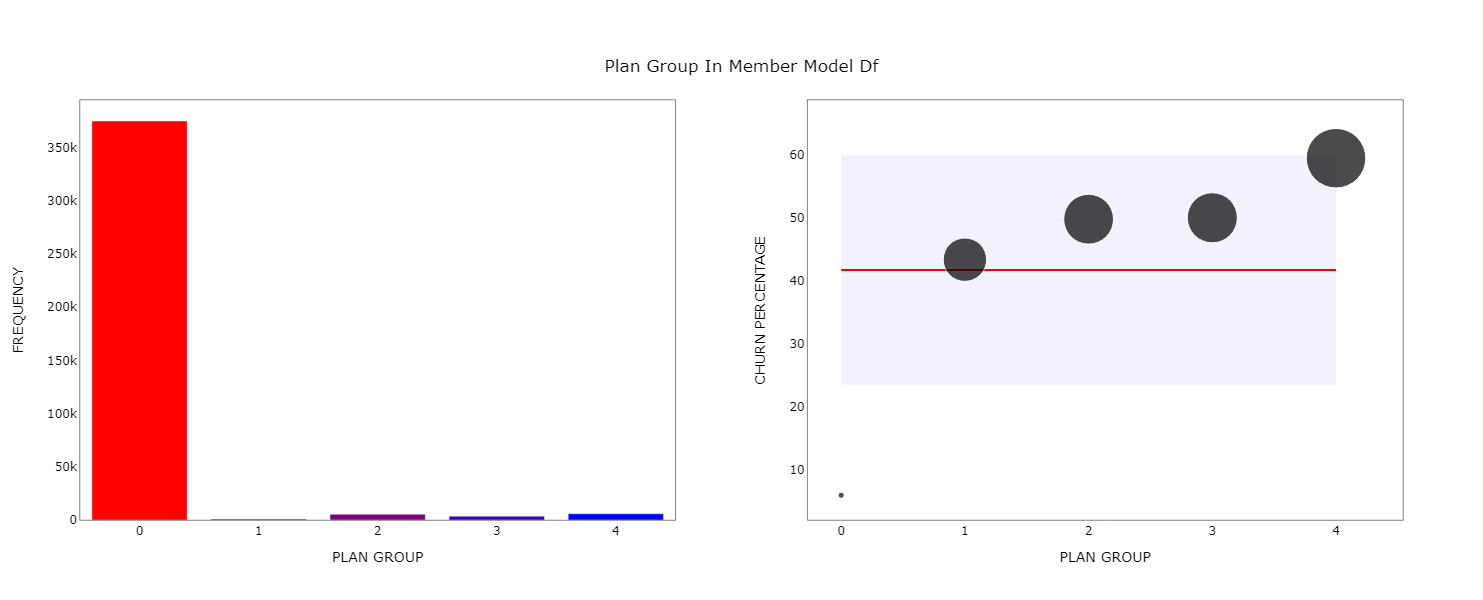

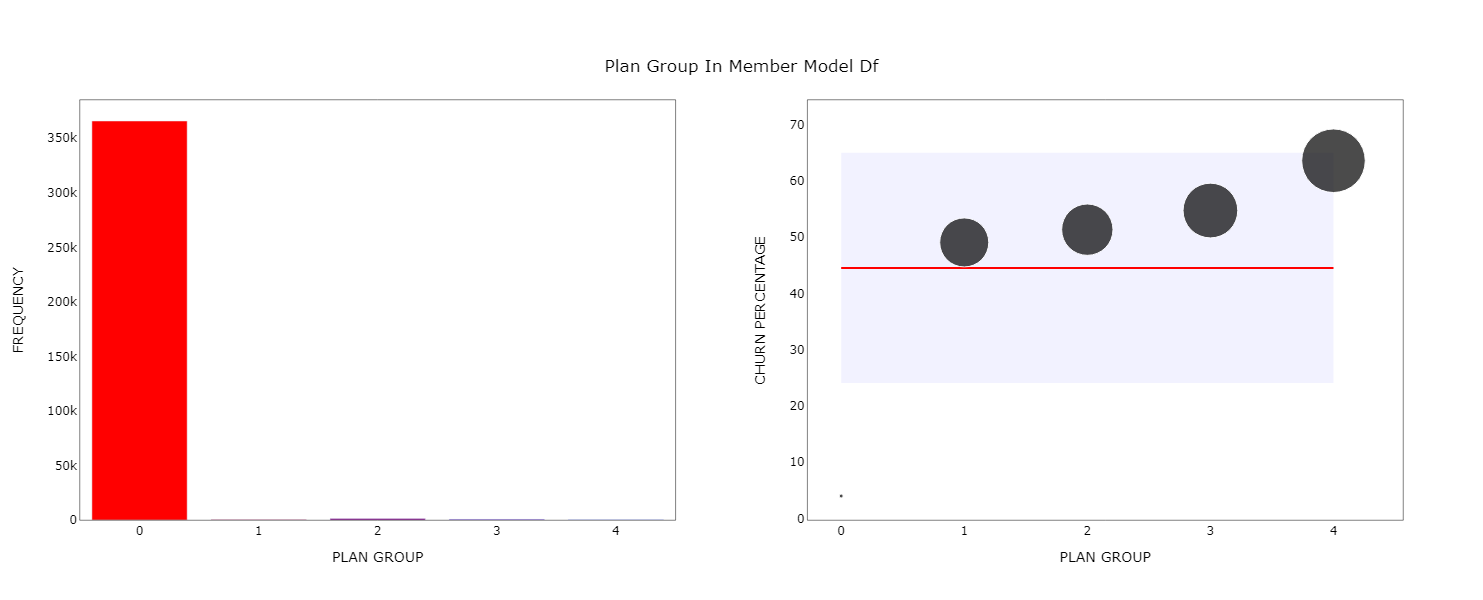

In [13]:
# Using 'bucketized' from func.py and 'bar_scatter_chart' from plots.py, categorize and display the 'Payment Plan Days' column.
# member_model_df
member_plan_df=pk.bucketized(member_model_df, 'payment_plan_days', 'plan_group', [31, 91, 181, 366])
pk.bar_scatter_chart(member_plan_df, 'plan_group', "member_model_df", 1)

# city_model_df
city_plan_df=pk.bucketized(city_model_df, 'payment_plan_days', 'plan_group', [31, 91, 181, 366])
pk.bar_scatter_chart(city_plan_df, 'plan_group', "member_model_df", 1)

<h4 style="padding: 10px;">Observation</h4>
<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #DEF0ED">Many customers opt for a monthly subscription.</p>

<h3> 9-2-2- Plan List Price and Actual Amount Paid</h3> 
<ol>
    <p><ins>Based on Price Category:</ins></p>
    <li>Unclear-Under 1 (Category 0)</li>
    <li>1 to 50 (Category 1)</li>
    <li>51 to 100 (Category 2)</li>
    <li>101 to 200 (Category 3)</li>
    <li>More than 201 (Category 4)</li>
</ol>

In [14]:
def plan_price(df: pk.DataFrame, params: pk.List[str] = []) -> None:
    """
    Plots bar scatter charts for plan prices.
    
    Args:
    - df (DataFrame): The input dataframe.
    - params (list of str): List of column names to be bucketized.
    
    Returns:
    None
    """
    chart_title = pk.PltAssets(df).get_variable_name()
    
    for param in params:
        # Extract base name from the param for constructing column names
        base_name = param.split('_')[0]
        price_group_col = f"{base_name}_price_group"
        
        # Bucketize the data based on given thresholds
        bucketized_df = pk.bucketized(df, param, price_group_col, [1, 51, 101, 201])
        
        # Plot the bar scatter chart
        pk.bar_scatter_chart(bucketized_df, price_group_col, chart_title)

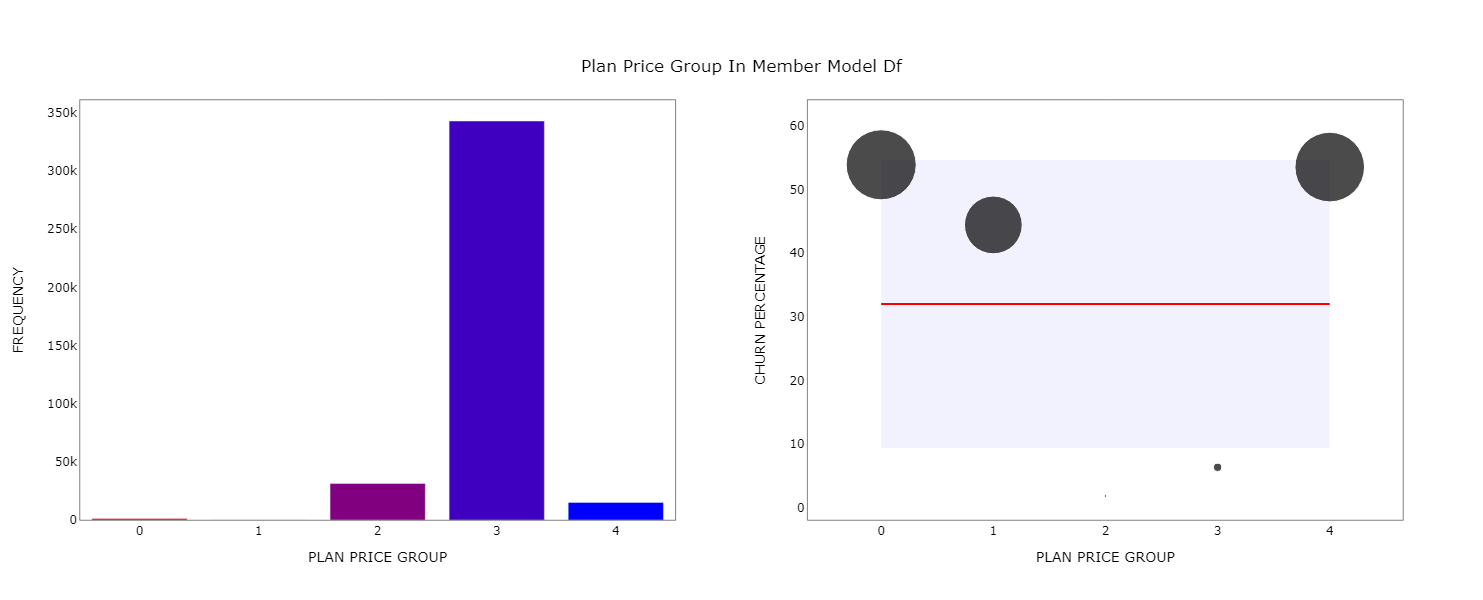

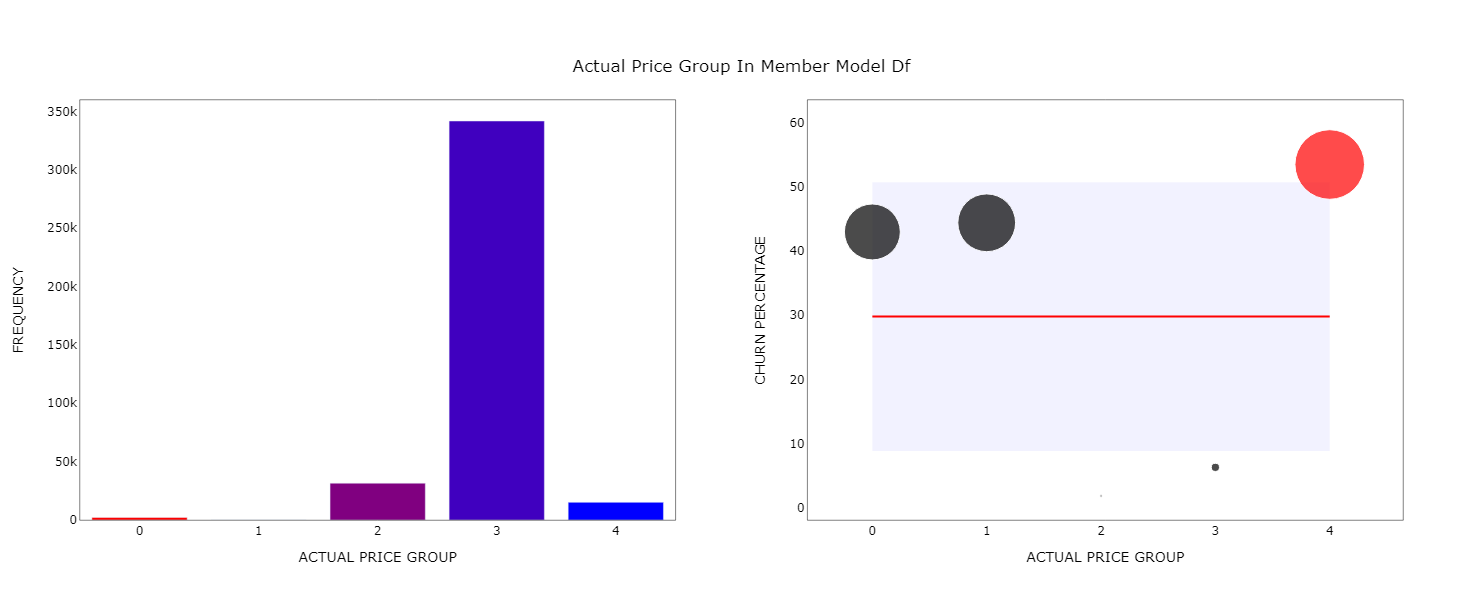

In [15]:
# member_model_df
plan_price(member_model_df, params=['plan_list_price','actual_amount_paid'])

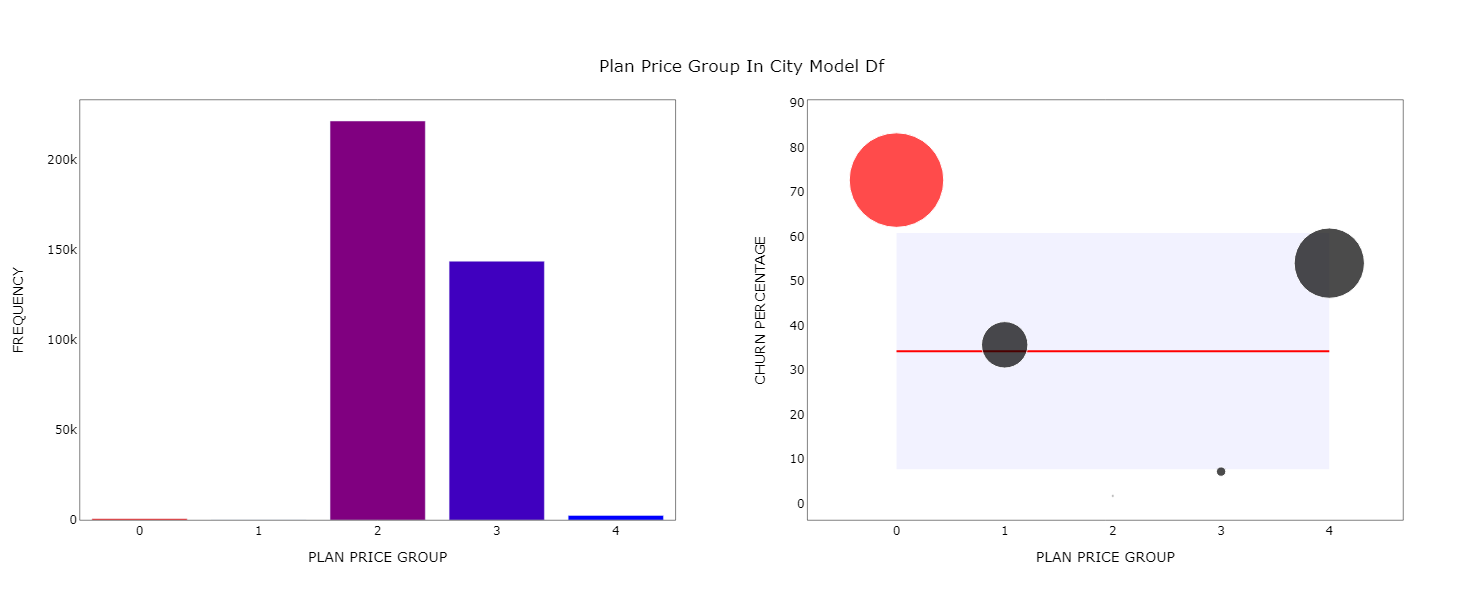

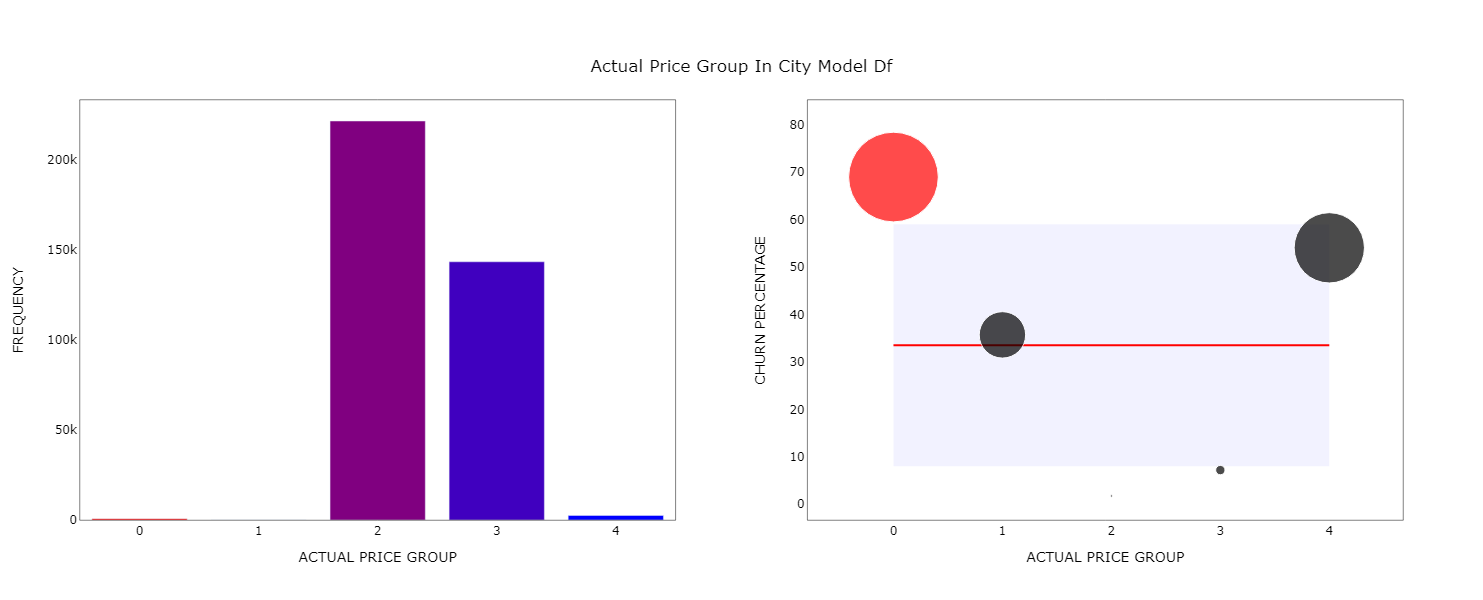

In [16]:
# city_model_df
plan_price(city_model_df, params=['plan_list_price','actual_amount_paid'])

<h4 style="padding: 10px;">Observation</h4>
<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #DEF0ED">Customers opt for 51 to 100 (Category 2) and 101 to 200 (Category 3) price.</p>

<h3> 10-2-2- Auto Renew and Cancellation</h3> 

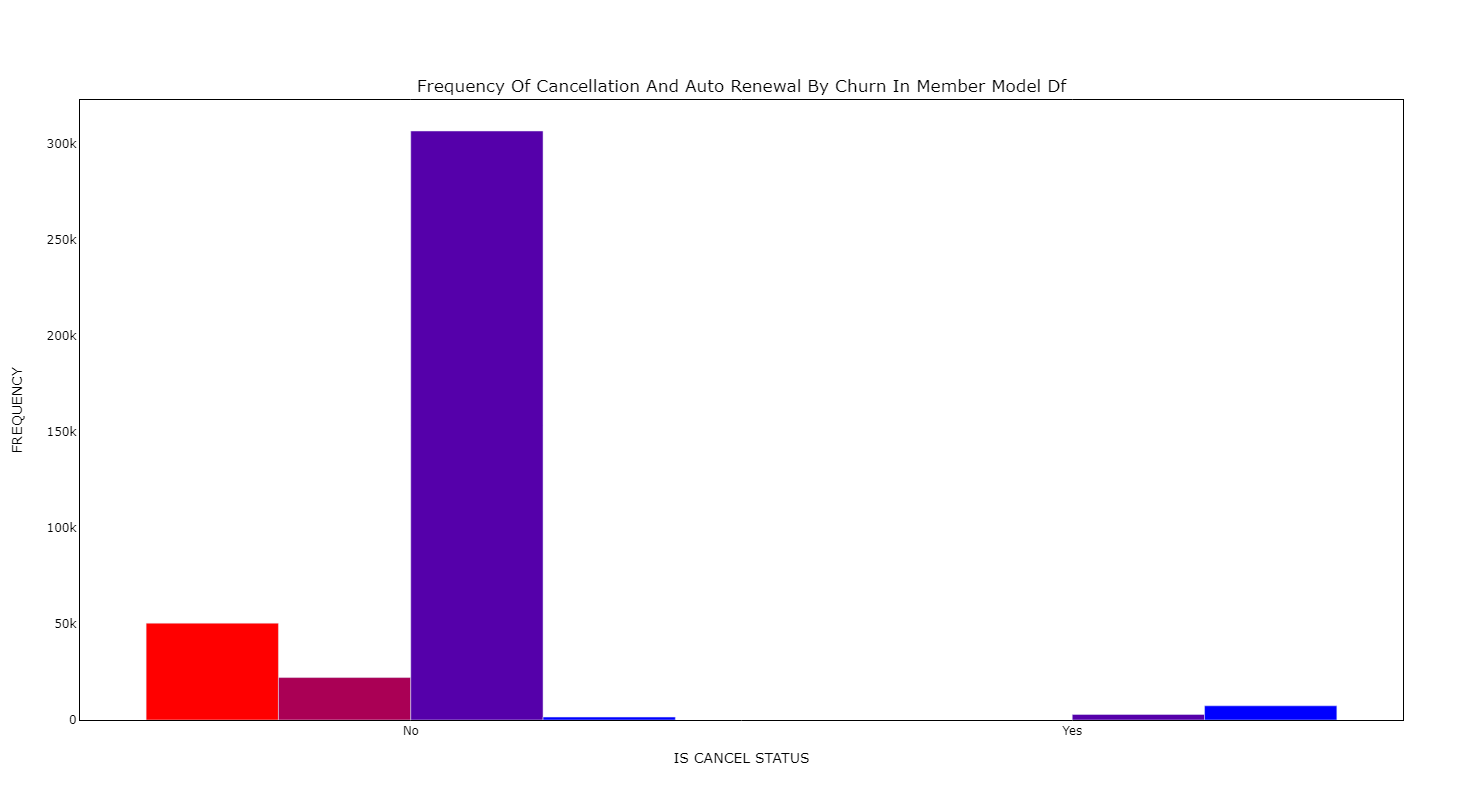

In [17]:
# member_model_df
pk.multiline(member_model_df,['is_cancel', 'is_auto_renew', 'is_churn'], "Frequency of Cancellation and Auto Renewal by Churn")

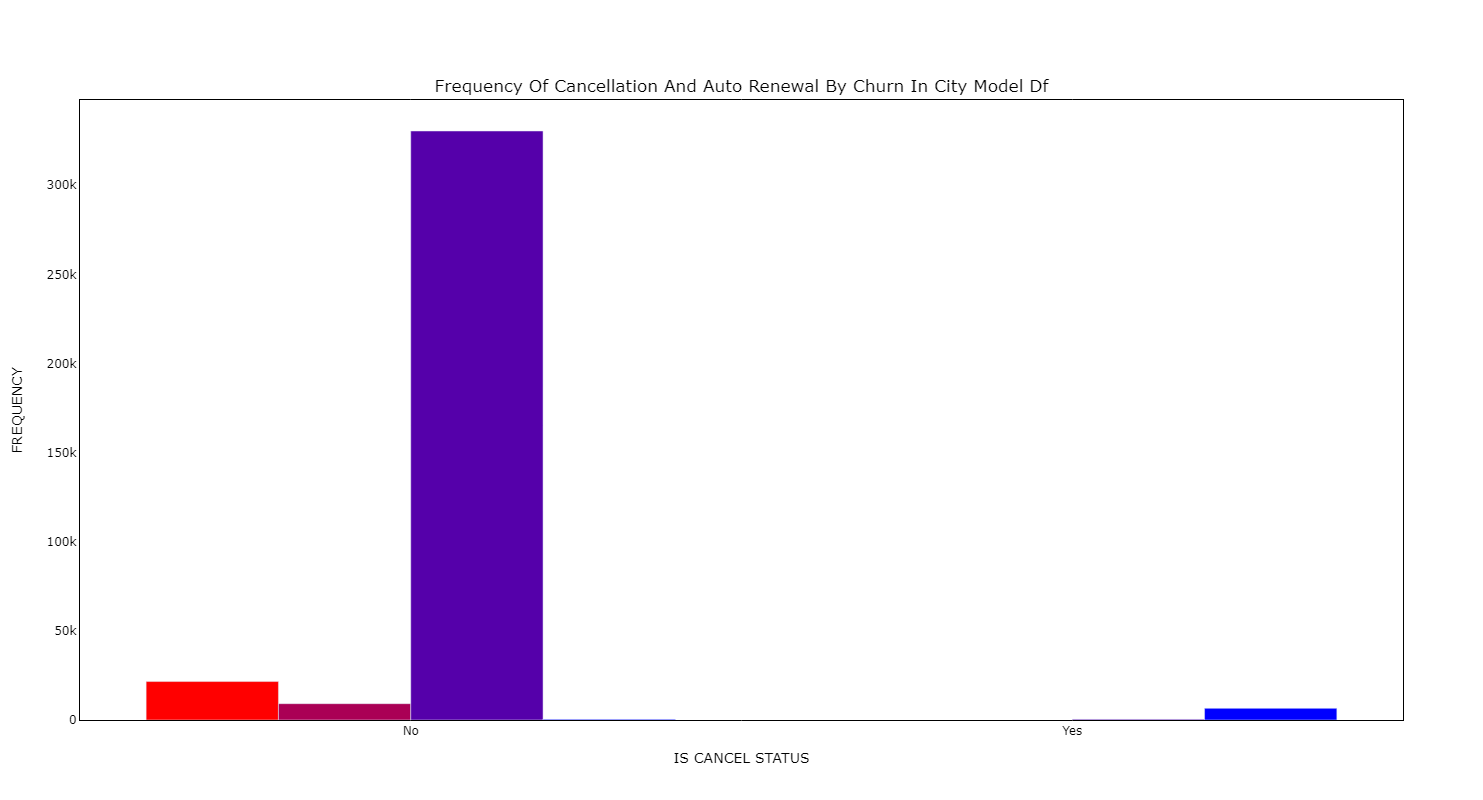

In [18]:
# city_model_df
pk.multiline(city_model_df,['is_cancel', 'is_auto_renew', 'is_churn'], "Frequency of Cancellation and Auto Renewal by Churn")

<h4 style="padding: 10px;">Observation</h4>
<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #DEF0ED">78.43% of customers in member_model_df and 89.67% of those in city_model_df are considered safe for business, exhibiting no cancellations, no churn, and possessing auto-renewal features. The proportion of high-risk customers is 5.65% in member_model_df and 2.48% in city_model_df, characterized by the absence of cancellations and auto-renewals, and the presence of churn. Additionally, around 2% of customers have shown churn alongside cancellations and auto-renewals.</p>

<h3> 11-2-2- Month Activity</h3> 

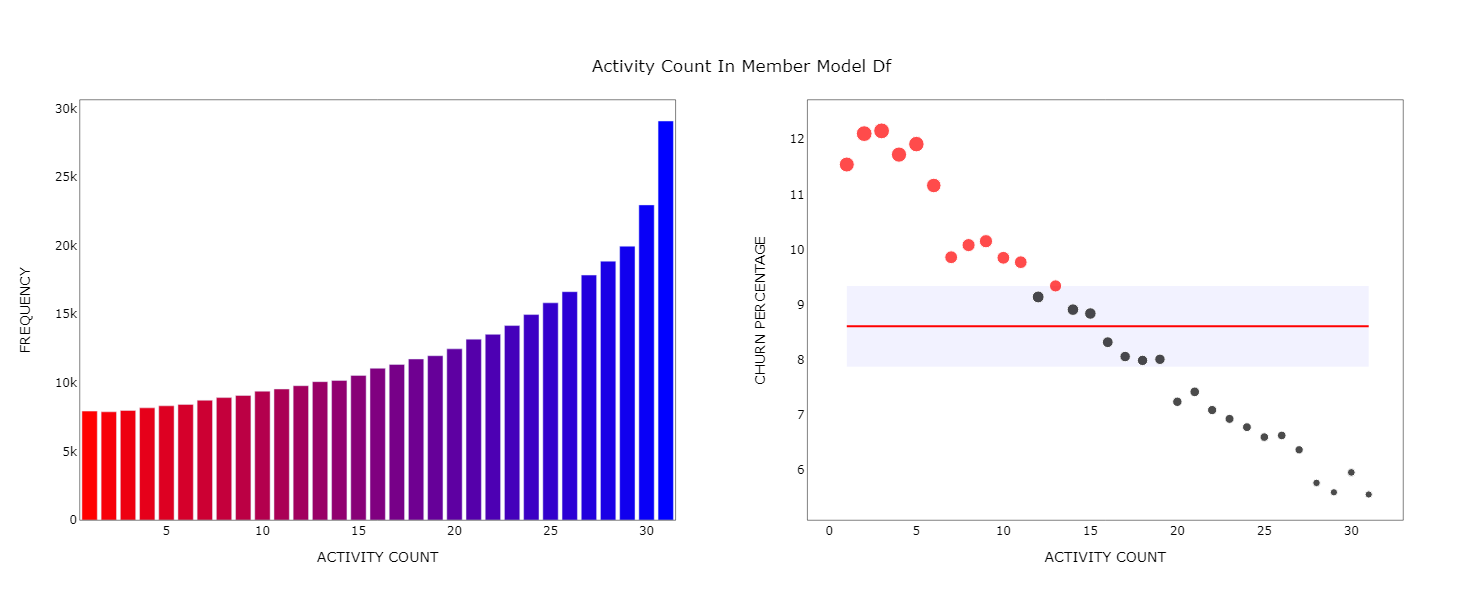

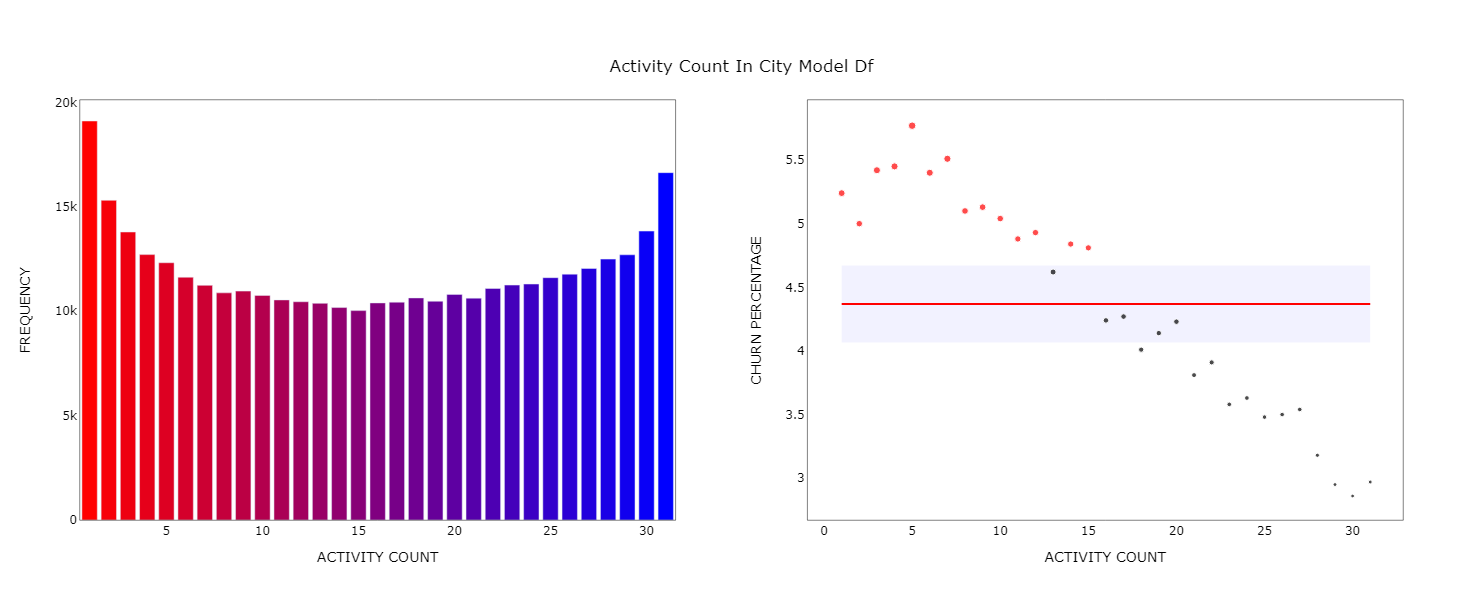

In [19]:
pk.bar_scatter_chart(member_model_df, 'activity_count')
pk.bar_scatter_chart(city_model_df, 'activity_count')

<h4 style="padding: 10px;">Observation</h4>
<p align="justify" style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #DEF0ED">In the member_model_df, there is observed growth in customer frequency corresponding to the number of days of activity, indicating an increase in daily user activity. However, for the city_model_df, the activity pattern exhibits a U-shape, suggesting variations in user engagement over time. Despite these differences, both DataFrames, member_model_df and city_model_df, show a consistent trend of decreasing churn rates with increased user activity.</p>

<h3> 12-2-2- Spending</h3> 

In [20]:
def sum_plot(dfs: pk.List[pk.DataFrame], param: str, bins: pk.List[pk.Union[int, float]] = [101, 1001, 100]) -> None:
    """
    Plots bar scatter charts for plan prices, bucketized by specified bins.
    
    Args:
    dfs (List[pd.DataFrame]): A list of input DataFrames.
    param (str): The column name in the DataFrame to be bucketized.
    bins (List[Union[int, float]], optional): The bin edges for bucketizing the column. 
                                             Defaults to [101, 1001, 100].
    
    Returns:
    None
    """
    for df in dfs:
        chart_title = pk.PltAssets(df).get_variable_name()
        
        # Construct column name for bucketized data
        price_group_col = f"{param}_group"

        # Bucketize the data based on the provided bins
        bucketized_df = pk.bucketized(df, param, price_group_col, bins)

        # Plot the bar scatter chart
        pk.bar_scatter_chart(bucketized_df, price_group_col, chart_title)

<h3>1-12-2-2- 25% of Tracks</h3>

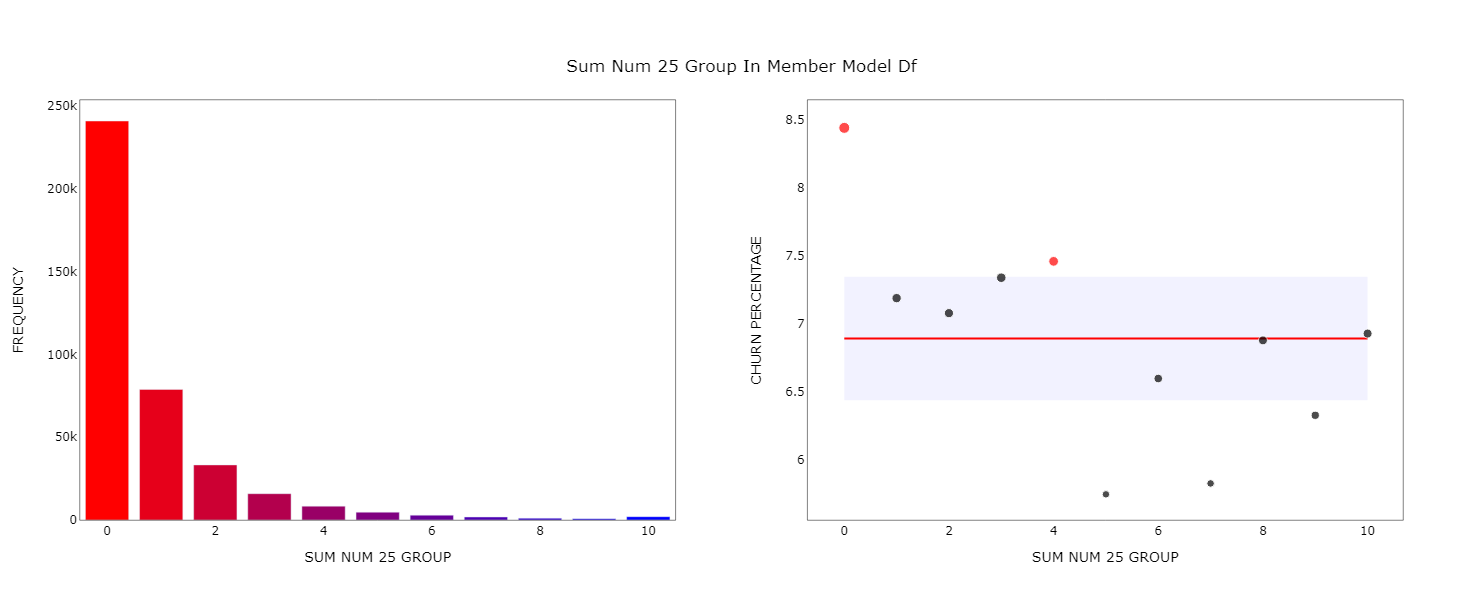

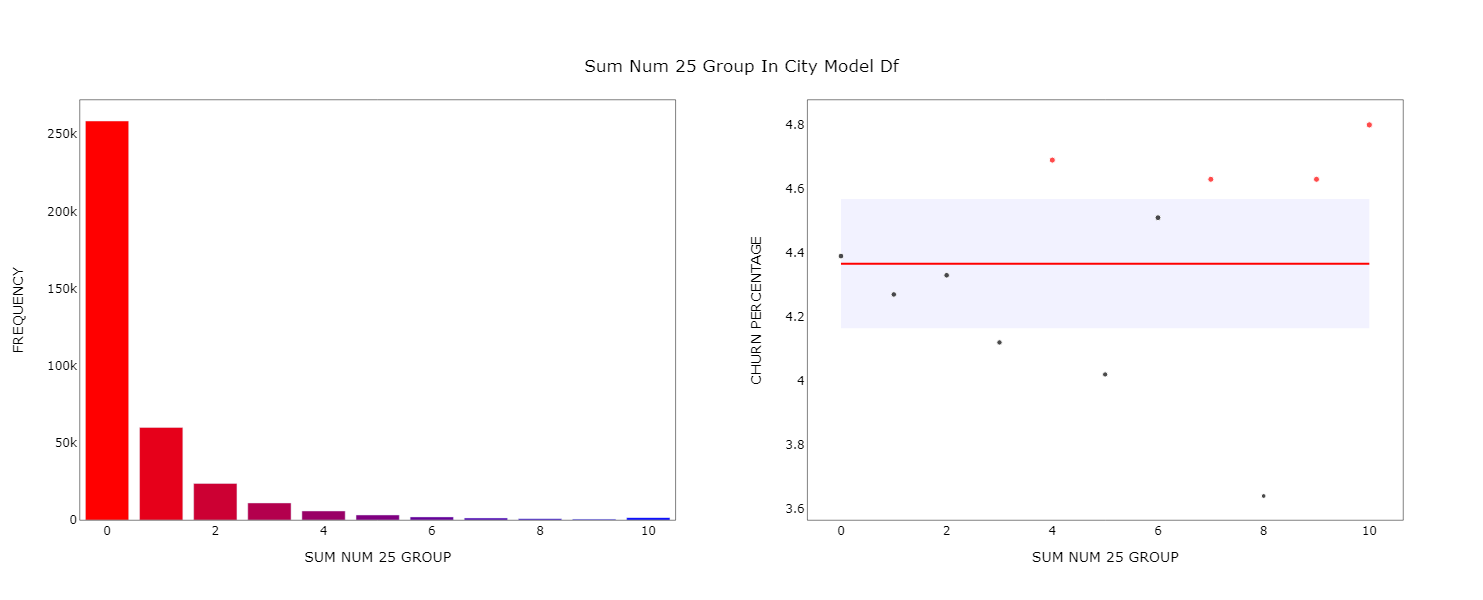

In [21]:
sum_plot([member_model_df,city_model_df], 'sum_num_25')

<h3>2-12-2-2- 50% of Tracks</h3>

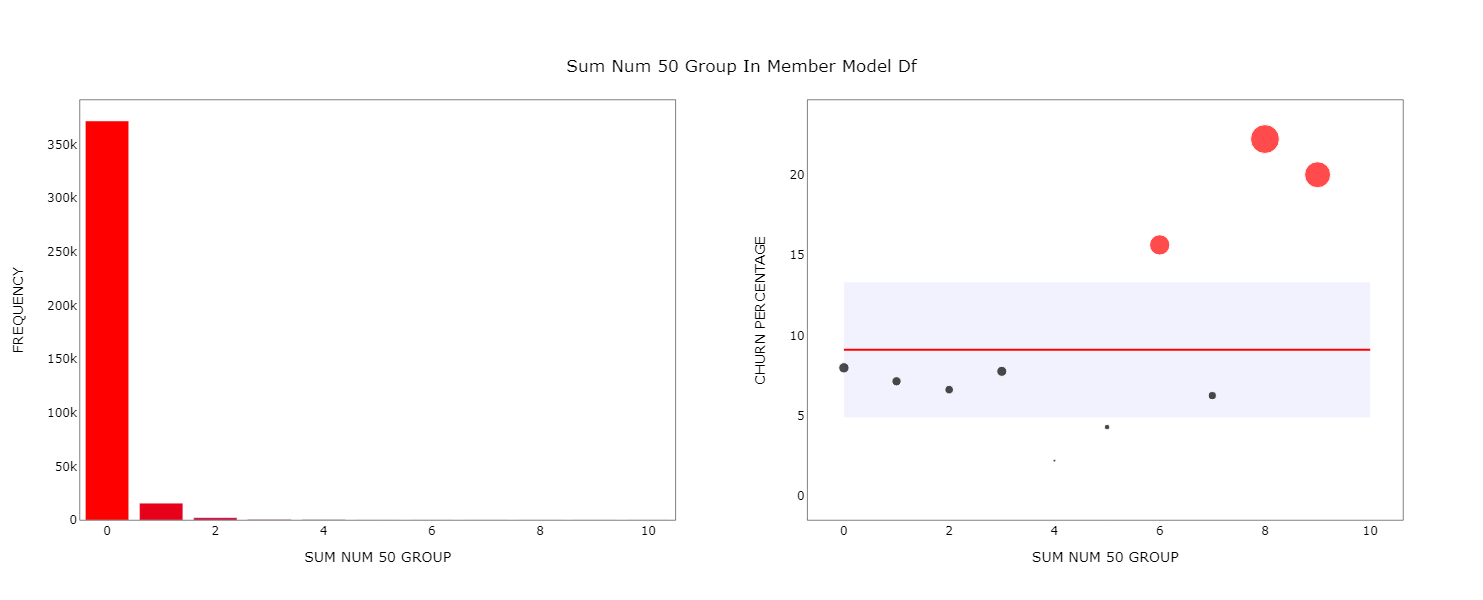

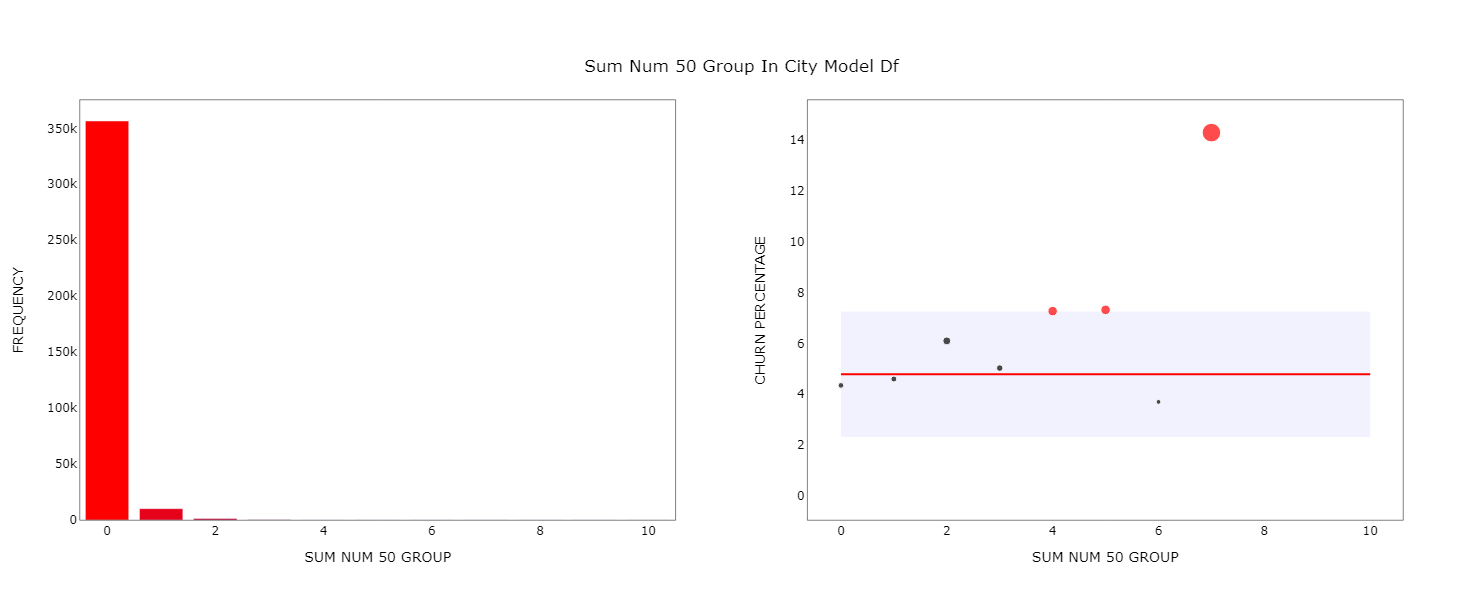

In [22]:
sum_plot([member_model_df,city_model_df], 'sum_num_50')

<h3>3-12-2-2- 75% of Tracks</h3>

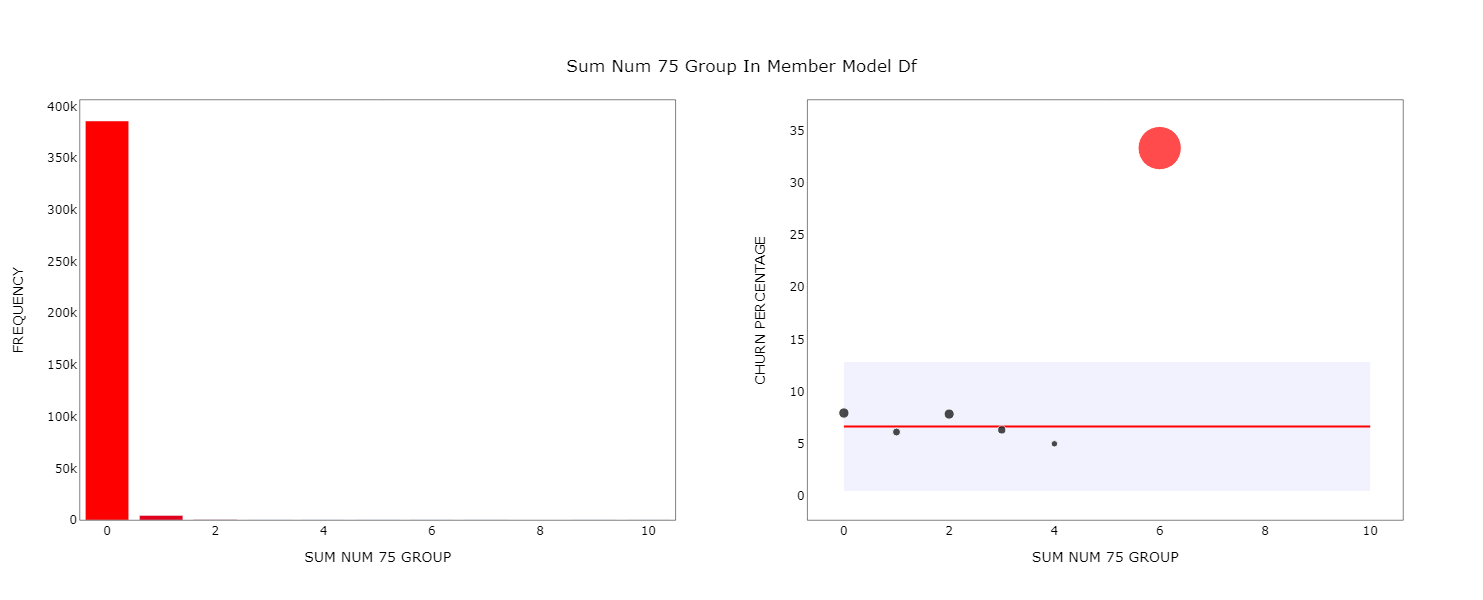

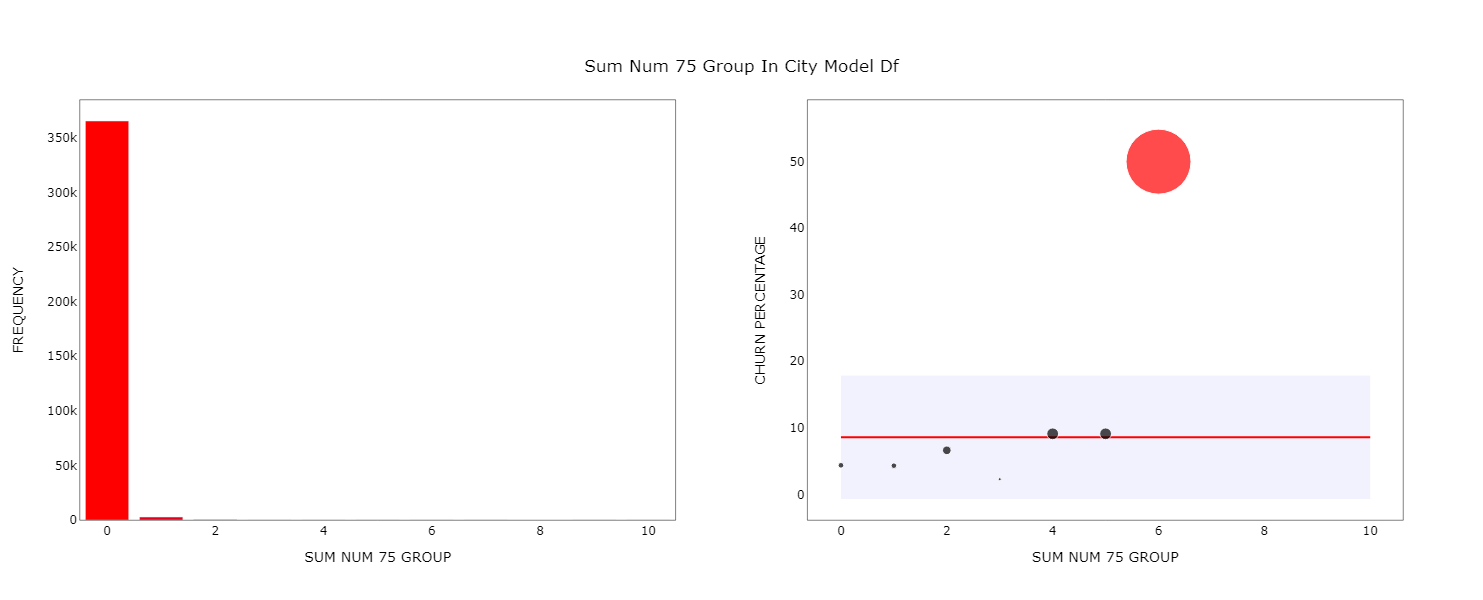

In [23]:
sum_plot([member_model_df,city_model_df], 'sum_num_75')

<h3>4-12-2-2- 98.5% of Tracks</h3>

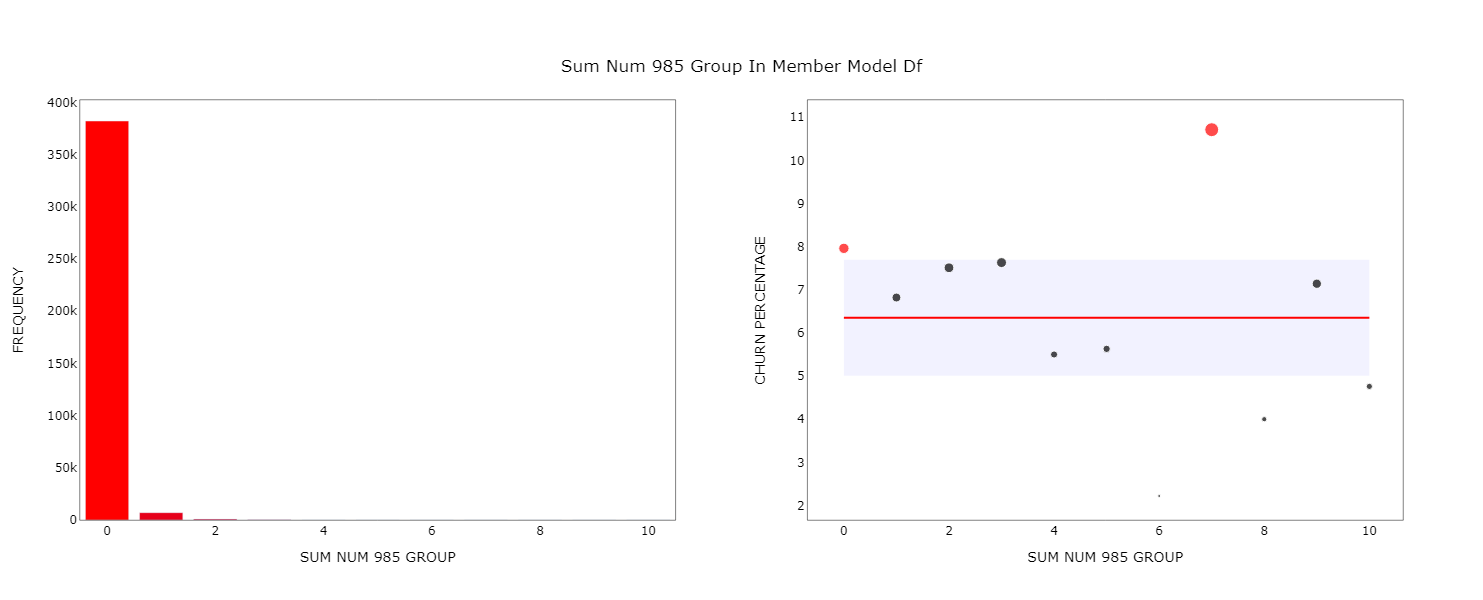

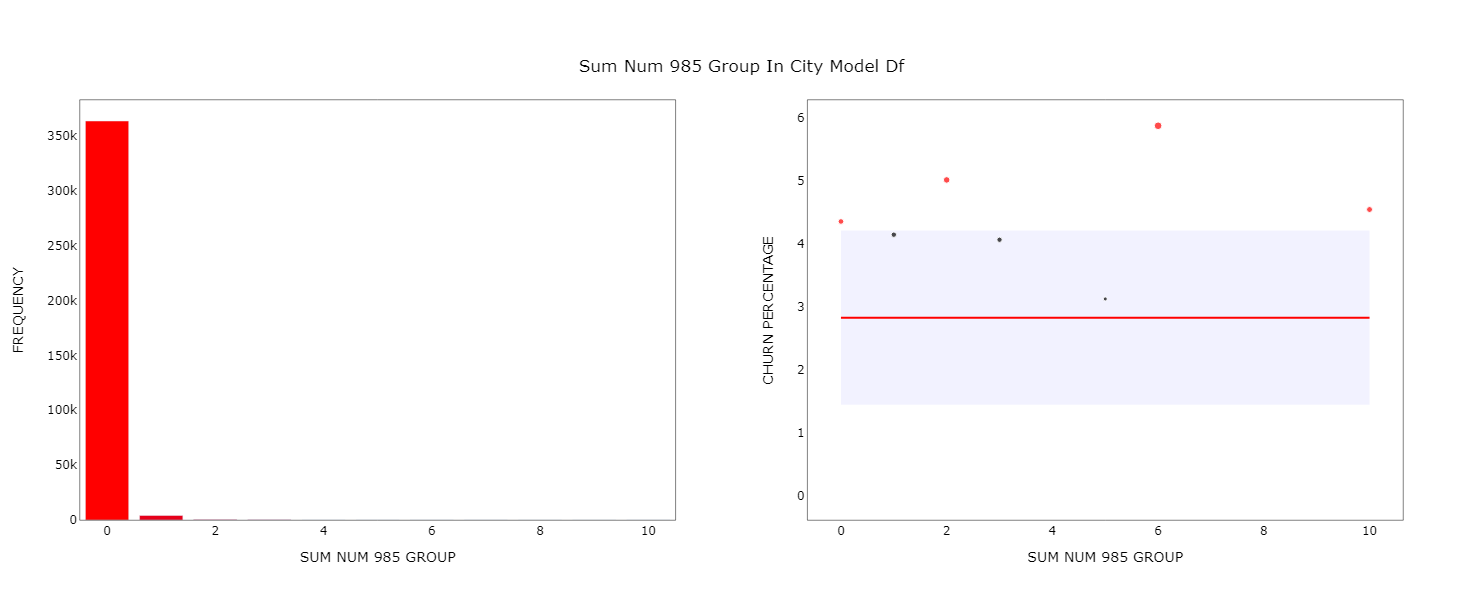

In [24]:
sum_plot([member_model_df,city_model_df], 'sum_num_985')

<h3>5-12-2-2- 100% of Tracks</h3>

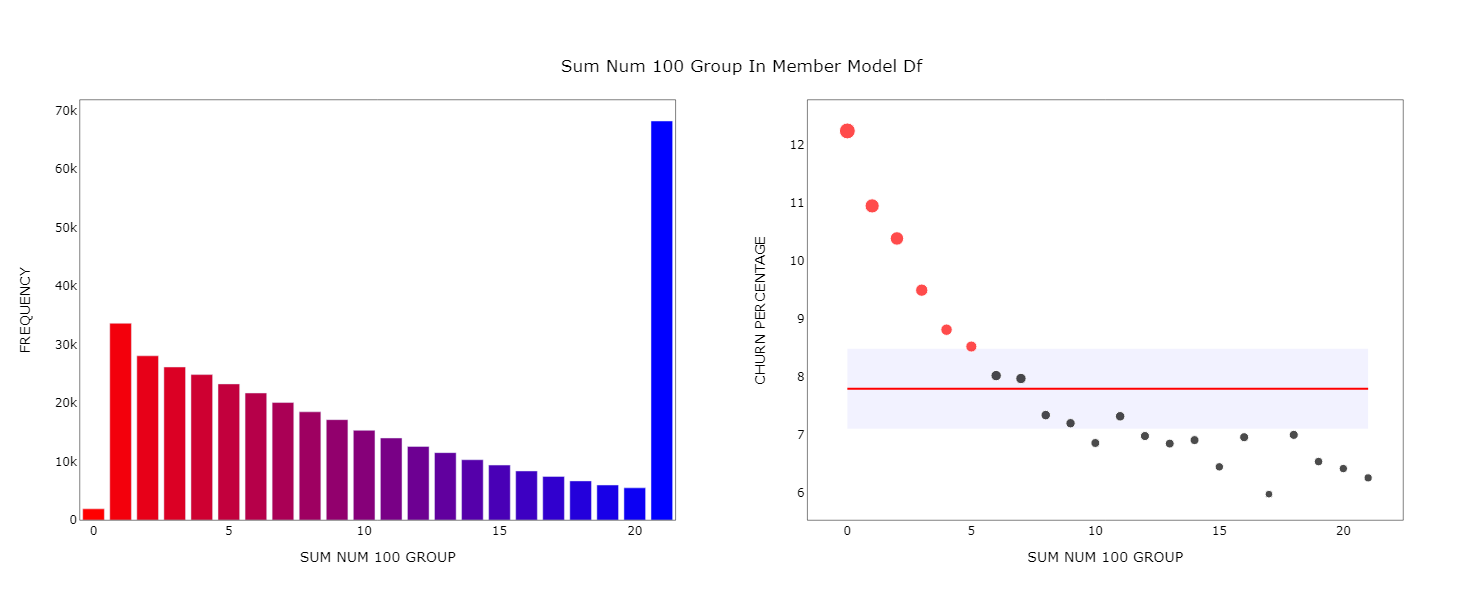

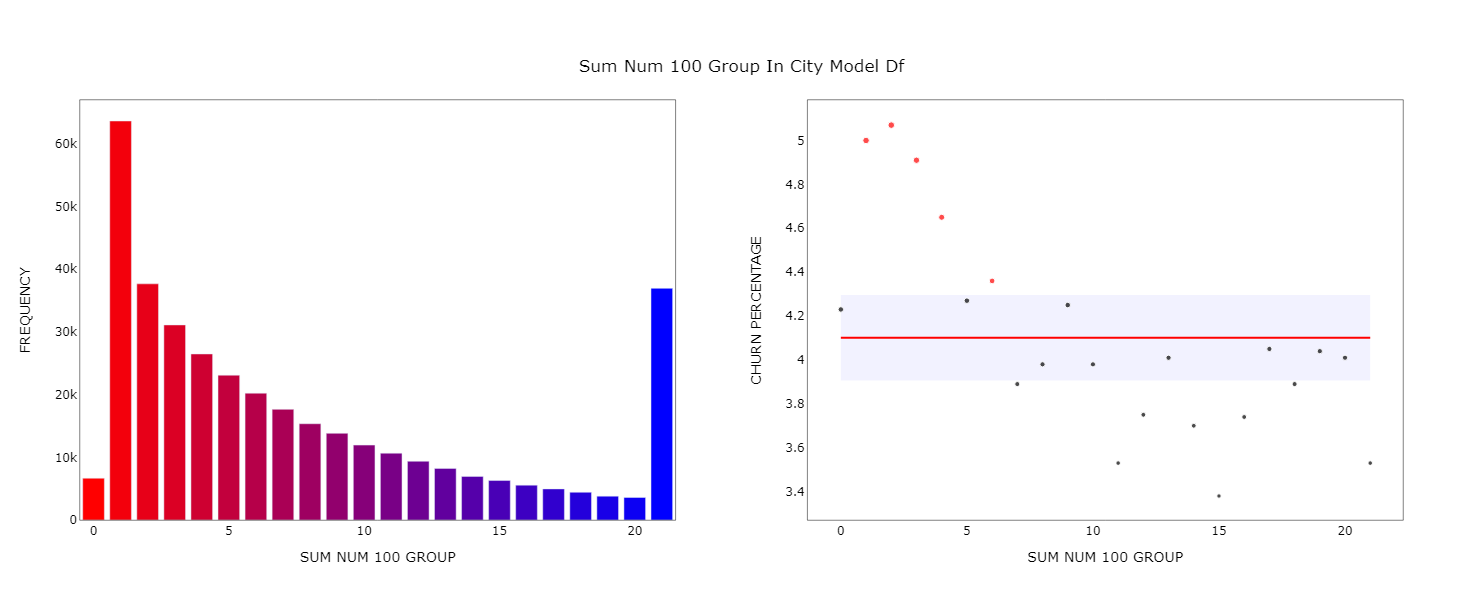

In [25]:
sum_plot([member_model_df,city_model_df], 'sum_num_100', [1,1000,50])

<h3>6-12-2-2- Unique Tracks</h3>

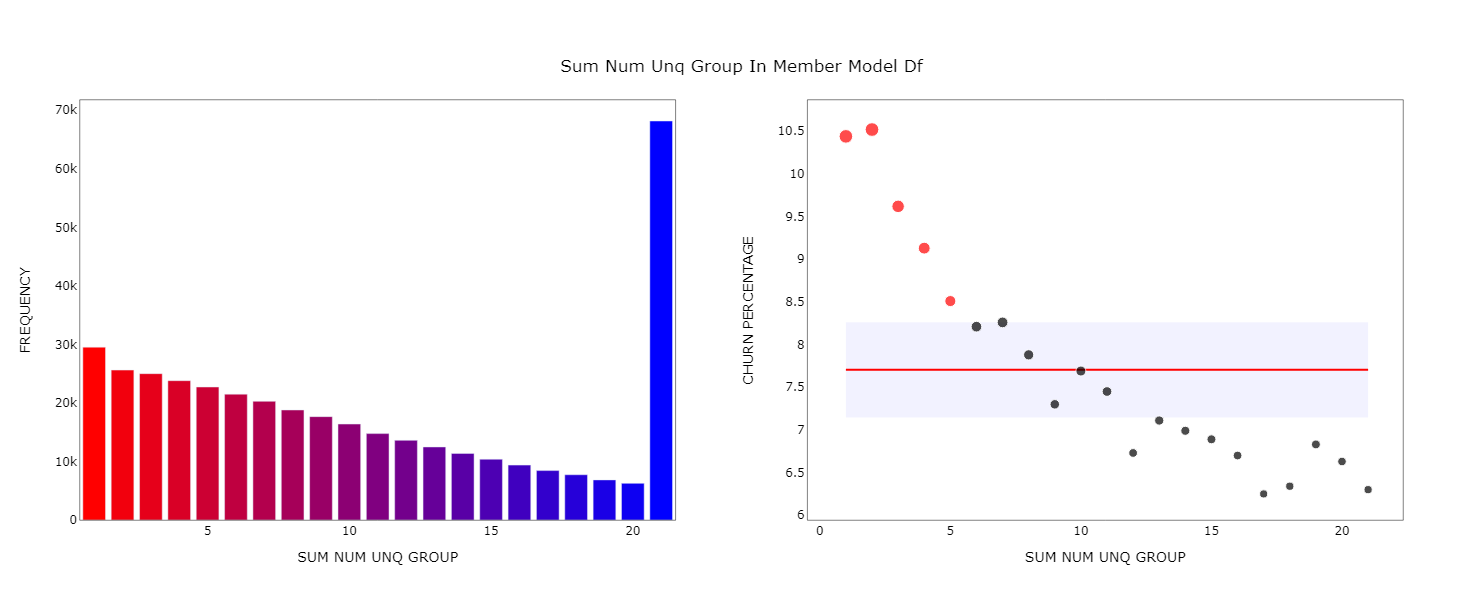

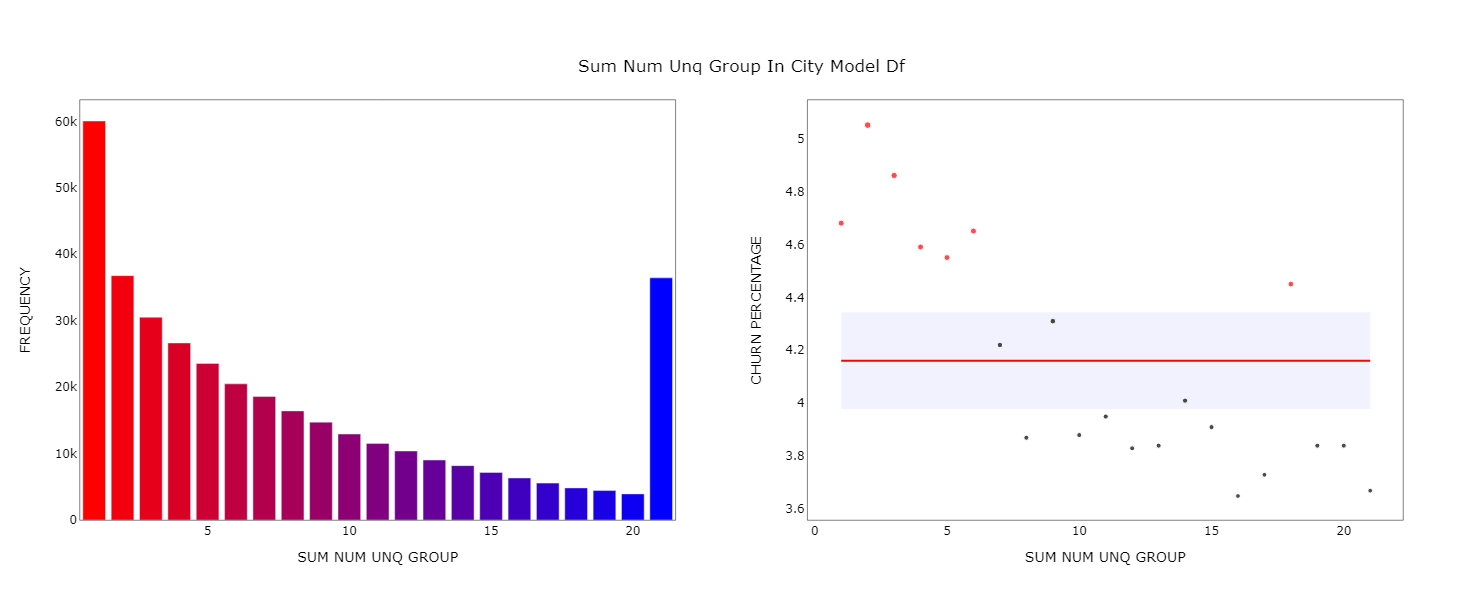

In [26]:
sum_plot([member_model_df,city_model_df], 'sum_num_unq', [1,1000,50])

<h3>7-12-2-2- Total Spending (seconds)</h3>

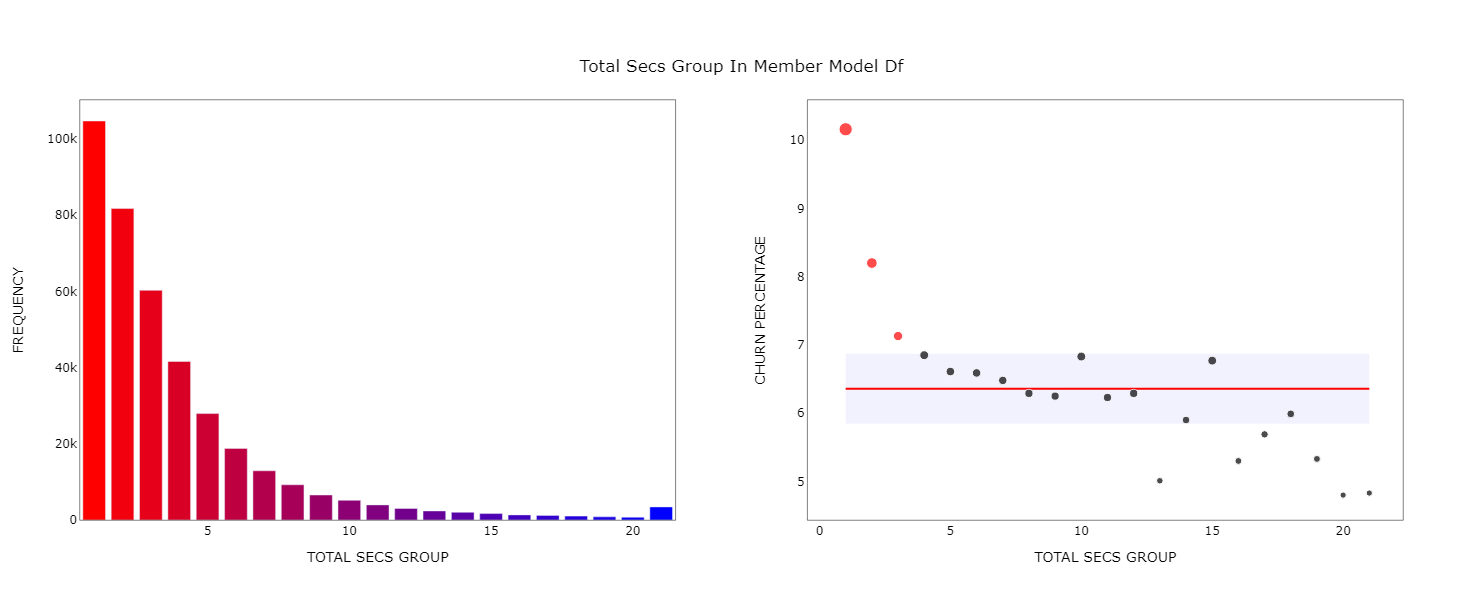

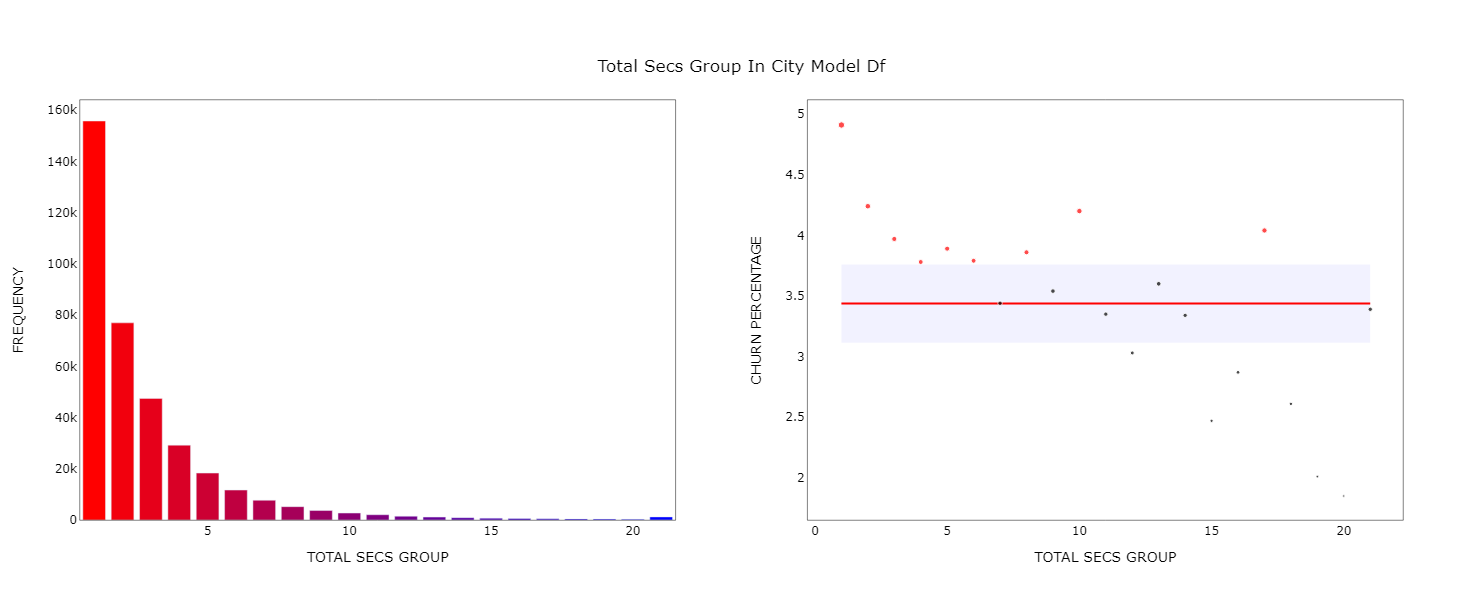

In [27]:
sum_plot([member_model_df,city_model_df], 'total_secs', [0,1000000,50000])